# **Study of the influence of public policy decisions on Covid 19 infections**



---




# **Lab 2: Regression to Study the Spread of Covid-19**

Section: 203.7

Professor: **Mark Labovitz**

Day & Time: Saturday 10 AM

Team Members (Team 3): 


> **George Jiang**


> **Ramon Jimenez**


> **Sudhrity Mondal**


---



# **1. Introduction**

The spread of Covid-19 across the globe has created a pandamic unseen in the   past century. Governments, corporations, households and people around the world have made considerable changes in the way we operate and proceed with our day-to-day life. These changes in the US are governed by local and state level policies and varies from state to state.

US federal government did not dictate any specific policy as a result the policy variations across different states were based on state leaders view of the crisis, their beliefs and dependance on conclusions based on science etc.

Our **causal theory** is that various state policies have helped reduce the infection rate of Covid-19. Therefore, this research study focuses on the following question:

**What is the effect size of state level public health policy decisions on the rate of COVID-19 infection after taking into account for the variations across different states like population density, poverty rate and population under risk of serious illnesses?**  



**1.1 Variables and Measurements**

To reduce type 1 error inflation, we preselected the **type of causal variables** we are going to use in the dataset before we did any EDA. Any EDA in the dataset is used to determine the best variable to include for each type and which variable transformation to use in the final model. 

The type of causal variables we decided to include in our causal model: state policy, age, health, socioeconomics, homeless, population density, baseline infection rate before state policy, and personal beliefs about state policy. 

***Dependent variable***

> **Cases in Last 7 Days**: We have chosen *CasesinLast7Days* as the dependent variable to study the immediate affect of public policy decisions over a short period of time, because the cases in the last 7 days happened after the State policy took effect. A new variable **infection_last_7_rate**=CasesinLast7Days/Population2018*10000 is created and used in the analysis, because we want to control for the difference in population across different States. Furthermore, we times the infection rate by 10000 to convert the percentage to basis point, because it makes interpretation of the coefficients easier. Variable Type: Real Number

***Independent variables related to our causal theory that we are able to find in the data***
 
> **1. Stay at home/ shelter in place**: The variables *Stayathomeshelterinplace* and *Endstayathomeshelterinplace* are used to calculate the duration of Stay at home/shelter in place in days. This is then converted to a binary variable. This is the key explanatory variable we want to estimate the effect size. A new variable **stay_at_home** is created and used in the analysis.Note, because 3 States had *Endstayathomeshelterinplace* date but no *Stayathomeshelterinplace*, we set these 3 samples as NA, because we don't know whether these 3 States had staty_at_home policy. Variable Type: Binary

> **2. Mandate face mask use by all individuals in public spaces**: 
The variables *Mandatefacemaskusebyallindividualsinpublicspaces* and *Stateendedstatewidemaskusebyindividualsinpublicspaces* are used to calculate the duration of mandated face masks in days. This is then converted to a binary variable. This policy variable serves as a control to better estimate the effect size of **stay_at_home**. A new variable **mask_mandate** is created and used in the analysis. Variable Type: Binary

> **3. Population density per square miles**: The population density (*Populationdensitypersquaremiles*) is used as a control variable because population density and Covid-19 infection are closely related. A new variable **pop_density**=Populationdensitypersquaremiles is created and used in the analysis. Variable Type: Real Number 

> **4. Percent at risk for serious illness due to COVID**: The percent at risk for serious illness due to Covid-19 (*PercentatriskforseriousillnessduetoCOVID*) is used as control because high risk population affects both the **stay_at_home** policy and infection rate. A new variable **due_covid_serious_ill_rate**=PercentatriskforseriousillnessduetoCOVID is created and used in the analysis. Variable Type: Real Number (0-100)

> **5. Number Homeless (2019)**: The variable *NumberHomeless2019* and *Population2018* are used as a control variable because they do not have a shelter in place. A new variable **homeless_2019_rate**=NumberHomeless2019/Population2018*10000 is created and used in the analysis. Variable Type: Real Number

> **6. Median Annual Household Income**: The variable *MedianAnnualHouseholdIncome* is used as a control for Covid-19 infection as household income level dictated if people had the means to support themselves and to adhere to the shelter in place policy guidelines. A new variable **median_annual_household_income**=MedianAnnualHouseholdIncome is created and used in the analysis. Variable Type: Real Number


**1.2 Potential Issues & Considerations**

1. There are two omitted variables (baseline infection rate and personal beliefs) that we cannot find in the dataset, which will bias our beta in our model 
2. Data is not identically distributed with the current state metrics: State population, population density and homeless numbers may have changed considerably since 2018 or 2019 and the data isn't updated for 2020.
3. Sample size is only 51, therefore we might not have enough statistical power to detect large enough difference in state policy.

**1.3 Exploratory Data Analysis**

**1.3.1 Read and Review Data**

The data file used for the research is *covid-19.xlsx*. Relevant data is extracted from the data for analysis. 




In [1]:
install.packages("patchwork")
install.packages("sandwich")
install.packages("lmtest")
install.packages("gridExtra")
install.packages("psych")
install.packages("stargazer")
install.packages("car")
install.packages("olsrr")

library(magrittr)
library(ggplot2)
library(patchwork)
library(sandwich)
library(lmtest)
library(gridExtra)
library(psych)
library(stargazer)
library(tidyverse)
library(readxl)
library(zoo)
library(car)
library(olsrr)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is

In [2]:
theme_set(theme_minimal())
knitr::opts_chunk$set(dpi = 300)
knitr::opts_chunk$set(echo = TRUE)


In [ ]:
# Read excel data

#https://drive.google.com/file/d/1MDRtdf-UI50lxWTJc4XMiif0NuanHef9/view?usp=sharing
system("gdown --id 1MDRtdf-UI50lxWTJc4XMiif0NuanHef9")
full_data=read_excel('covid-19.xlsx', sheet=2, skip=1, col_names=TRUE)


In [4]:
#Extraction column names

names(full_data)=make.names(names(full_data))
names(full_data) <- gsub("\\.", "", names(full_data))


In [ ]:
# Reviewing data samples

str(full_data)


In [ ]:
head(full_data)

**1.3.2 Column Renames and Data Processing**



In [6]:
# Renaming column names and feature extraction 
data<-full_data%>%
  transmute(
    #rates
    state=State,
    infection_last_7_rate=CasesinLast7Days/Population2018*10000,
    infection_rate=TotalCases/Population2018*100,
    covid_death_last_7_rate=DeathsinLast7Days/CasesinLast7Days*10000,
    covid_death_rate=TotalDeaths/TotalCases*100,
    test_rate=XTestsPerformed/Population2018*100,
    white_pop_rate=WhiteofTotalPopulation14*100,
    black_pop_rate=as.numeric(BlackofTotalPopulation16)*100,
    hispanic_pop_rate=as.numeric(HispanicofTotalPopulation18)*100,
    other_pop_rate=OtherofTotalPopulation28*100,
    due_covid_serious_ill_rate=PercentatriskforseriousillnessduetoCOVID,
    non_elderly_pec_rate=NonelderlyAdultsWhoHaveAPreExistingCondition/Population2018*100,
    all_death_2018_rate=Allcausedeaths2018/Population2018*100,
    unemployed_2018_rate=PercentUnemployed2018,
    poverty_rate=Percentlivingunderthefederalpovertyline2018,
    homeless_2019_rate=(NumberHomeless2019/Population2018)*10000,
    pop_under18_rate=Children018*100,
    pop_19_25_rate=Adults1925*100,
    pop_26_34_rate=Adults2634*100,
    pop_35_54_rate=Adults3554*100,
    pop_54_64_rate=Adults5564*100,
    pop_65_plus_rate=X65*100,
    Retailrecreation_rate=Retailrecreation,
    Grocerypharmacy_rate=Grocerypharmacy,
    Parks_rate=Parks,
    Transitstations_rate=Transitstations,
    Workplaces_rate=Workplaces,
    Residential_rate=Residential,
    medicaid_exp_rate=as.numeric(MedicaidExpendituresasaPercentofTotalStateExpendituresbyFund)*100,
    case_rate=CaseRateper100000,
    case_rate_last_7=CaseRateper100000inLast7Days,

    #absolute numbers
    homeless_2019=NumberHomeless2019,
    pop_density=Populationdensitypersquaremiles,
    poverty=Percentlivingunderthefederalpovertyline2018/100*Population2018,
    pop_under18=Children018*Population2018,
    pop_19_25=Adults1925*Population2018,
    pop_26_34=Adults2634*Population2018,
    pop_35_54=Adults3554*Population2018,
    pop_54_64=Adults5564*Population2018,
    pop_65_plus=X65*Population2018,
    median_annual_household_income=MedianAnnualHouseholdIncome,
    federal_aid=WeeklyUImaximumamountwithextrastimulusthroughJuly312020dollars,
    
    #policy dates

    business_close_dt=as.Date(Closedothernonessentialbusinesses,origin = "1899-12-30"),
    business_reopen_dt=as.Date(Begantoreopenbusinessesstatewide,origin = "1899-12-30"),
    stay_at_home_dt=as.Date(Stayathomeshelterinplace,origin = "1899-12-30"),
    end_stay_at_home_dt=as.Date(Endstayathomeshelterinplace,origin = "1899-12-30"),
    mask_mandate_dt=as.Date(Mandatefacemaskusebyallindividualsinpublicspaces,
        origin = "1899-12-30"),
    end_mask_mandate_dt=as.Date(Stateendedstatewidemaskusebyindividualsinpublicspaces,
        origin = "1899-12-30"),
        stay_at_home_dt=as.Date(ifelse(stay_at_home_dt=='1899-12-30','2020-10-30',
        as.character(stay_at_home_dt))),
    end_stay_at_home_dt=as.Date(ifelse(end_stay_at_home_dt=='1899-12-30','2020-10-30',
        as.character(end_stay_at_home_dt))),
    mask_mandate_dt=as.Date(ifelse(mask_mandate_dt=='1899-12-30','2020-10-30',
        as.character(mask_mandate_dt))),
    end_mask_mandate_dt=as.Date(ifelse(end_mask_mandate_dt=='1899-12-30','2020-10-30',
        as.character(end_mask_mandate_dt))),
    
    #policy duration
    stay_at_home_duration=as.numeric(end_stay_at_home_dt-stay_at_home_dt),
    mask_mandate_duration=as.numeric(end_mask_mandate_dt-mask_mandate_dt),
    business_close_duration=as.numeric(business_reopen_dt-business_close_dt),

    #policy enactment binary
    legal_enforcement_mask=ifelse(mask_mandate_duration>0 & 
        Nolegalenforcementoffacemaskmandate==0,1,0),
    business_close=ifelse(business_close_duration>0,1,0),
    stay_at_home=ifelse(stay_at_home_duration>0,1,0),
    mask_mandate=ifelse(mask_mandate_duration>0,1,0)
    
  )

data$stay_at_home <- replace(data$stay_at_home, which(data$stay_at_home_duration <0), NA)

data$stay_at_home_duration <- replace(data$stay_at_home_duration, 
    which(data$stay_at_home_duration < 0), NA)



Warning message:
“Problem with `mutate()` input `black_pop_rate`.
ℹ NAs introduced by coercion
ℹ Input `black_pop_rate` is `as.numeric(BlackofTotalPopulation16) * 100`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `medicaid_exp_rate`.
ℹ NAs introduced by coercion
ℹ Input `medicaid_exp_rate` is `*...`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


We processed data for the following reasons:
1. We renamed long names to shorter names that is easier to understand
2. We converted most data to percentage to control for difference in population between States
3. We times these percentage by 100 to make the coefficients larger easier to interperet. 
4. We checked for incorrect or weird values and found 3 States with missing **stay at home** policy data, in the end we removed them. But in hindsight, we should have kept them and impute the correct data to avoid deletion bias. 
5. We didn't remove any "outliers", because we don't want to introduce any subjective bias into the data.

**1.3.3 Pairs Review for Feature Selection**

After data processing, we use pairs function to do exploratory data analysis (EDA). By using pairs, we can examine each variable's relationship with target outcome variable, including shape of the variable distriubtion, scatterplot and correlation, which we will use for feature selection later on.  Furthermore, we use pairs on both the original data and transformed data to compare the which variables we will include in our final model.

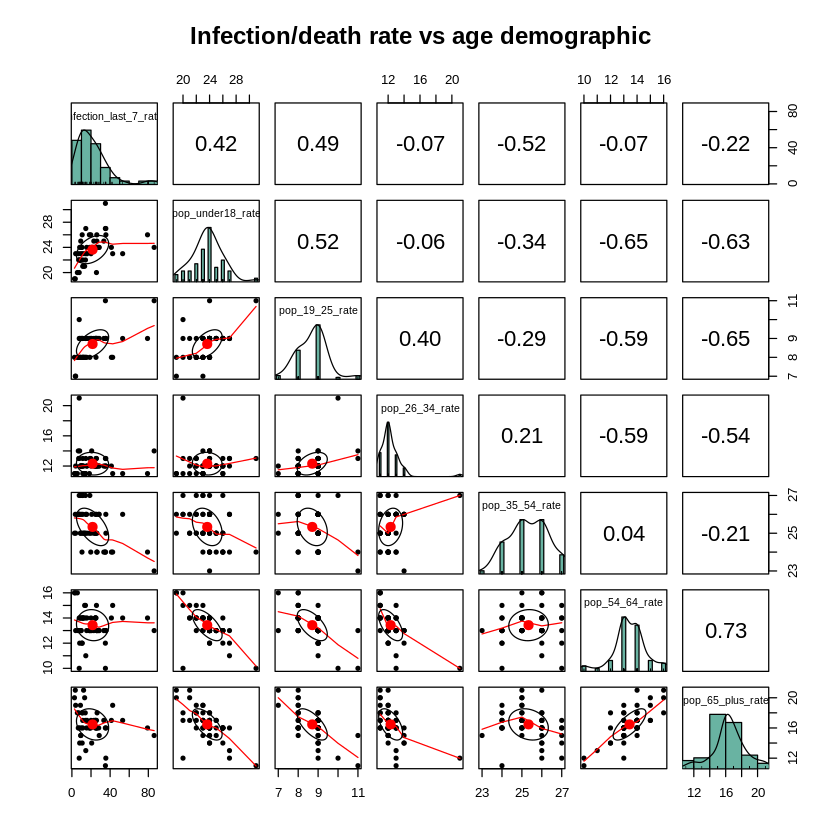

In [7]:
#Pairs of relevant feaures

#infection/death rate vs age demographic
age<-data%>%
  select(infection_last_7_rate,pop_under18_rate,pop_19_25_rate,
    pop_26_34_rate,pop_35_54_rate,pop_54_64_rate, pop_65_plus_rate)  

pairs.panels(age, method = "pearson", hist.col = "#69b3a2",  
main = "Infection/death rate vs age demographic")



**Age**

1. Age variables are approximately normally distributed.
2. Age group <= 25 and 35-54 show moderate/strong correlation with last 7 days infection rate. This make logical sense as we can reasonably argue that younger population are more likely to go out and get infected, therefore, we *might* control for their population difference across the States.
4. In addition, these group's scatterplot show a linear relationship with infection rate
5. We will consider age group for our control variable


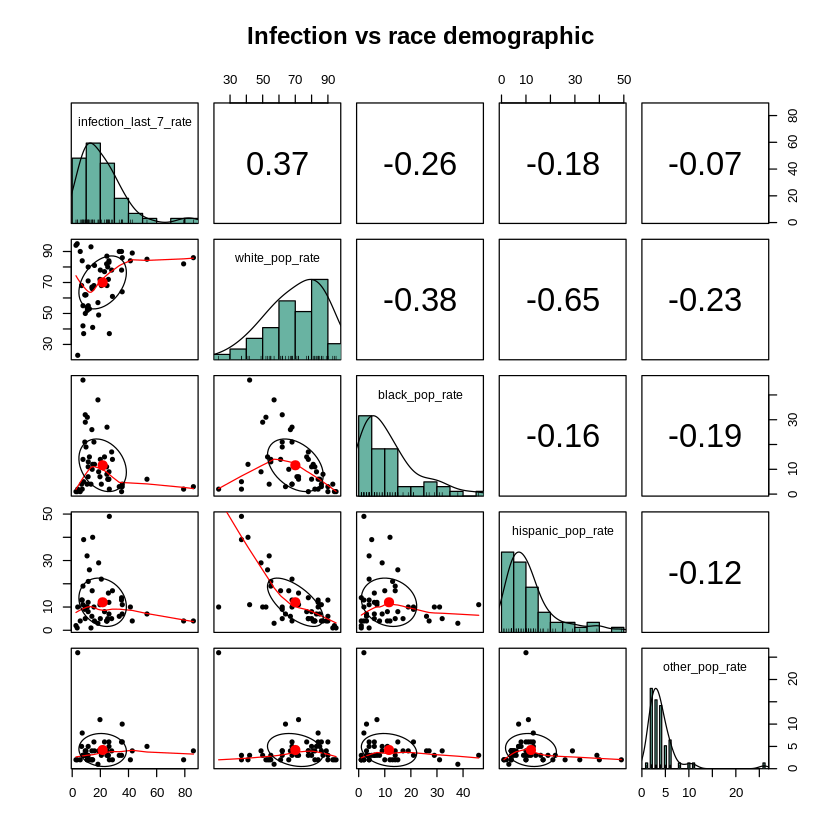

In [8]:
#infection rate vs race demographic
race<-data%>%
  select(infection_last_7_rate,white_pop_rate,black_pop_rate,hispanic_pop_rate,other_pop_rate)  

pairs.panels(race, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs race demographic")


**Race Factor**

1. White population rate show moderate correlation with last 7 days infection rate
2. However, race group's scatterplot don't show a linear relationship with infection rate even after log transformation, which violates the assumption of CLM.
3. Lastly we don't see any causal link between race and infection that is not already explained by other socioeconomic factor, therefore we will not use Race as a controlling variable, but we will include in model 3 to *overfit* the model per lab 2 instruction.

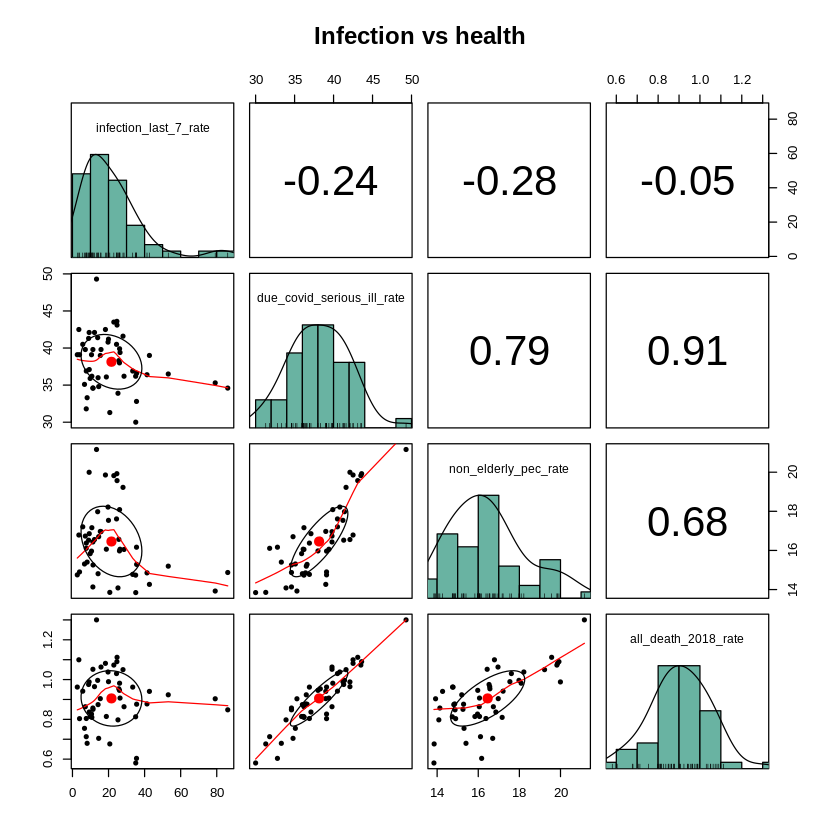

In [9]:
#infection rate vs health
health<-data%>%
  select(infection_last_7_rate,due_covid_serious_ill_rate,non_elderly_pec_rate,all_death_2018_rate) 
  
pairs.panels(health, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs health")


**Health Factor**

1. Health variables are approximately normally distributed.

2. Both due_covid_serious_ill_rate and non_elderly_pec_rate show moderate correlation with last 7 days infection rate.

3. However, only due_covid_serious_ill_rate's scatterplot show a more linear relationship with infection rate.

4. In addition, due_covid_serious_ill_rate represent % population that is high risk to covid-19, who are more likely to self quarantine even without **stay_at_home** policy. Therefore we should use it as a control variable. 

5. Because this variable already includes age information, we consider using it over age variables because it can control for 2 variables with a single parameter. 

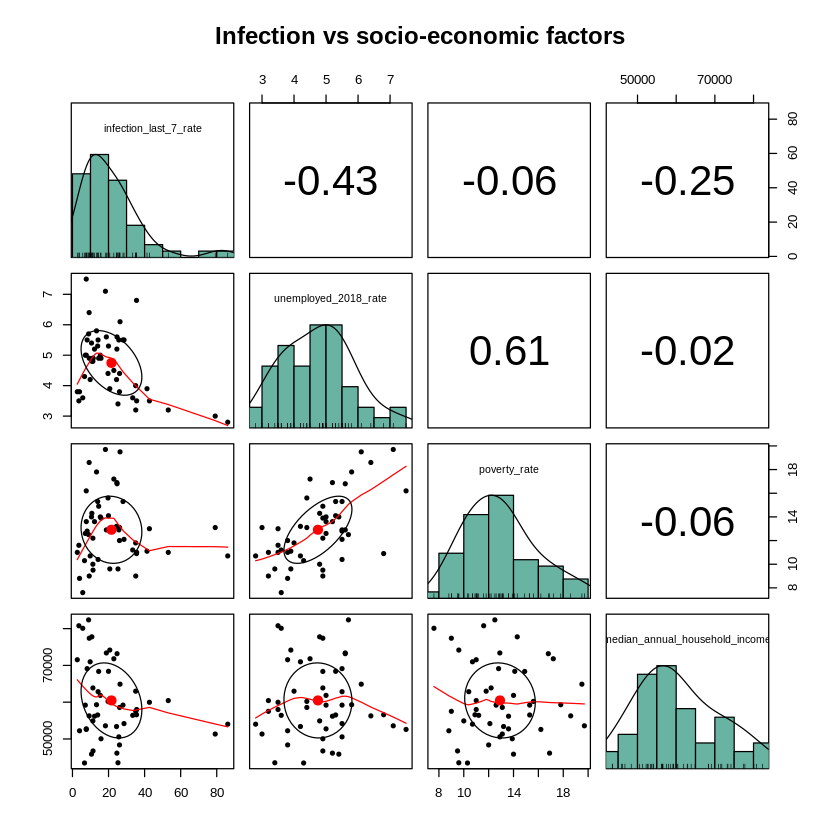

In [10]:
#infection rate vs socioeconomics
economic<-data%>%
  select(infection_last_7_rate,unemployed_2018_rate,poverty_rate,median_annual_household_income)  

pairs.panels(economic, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs socio-economic factors")

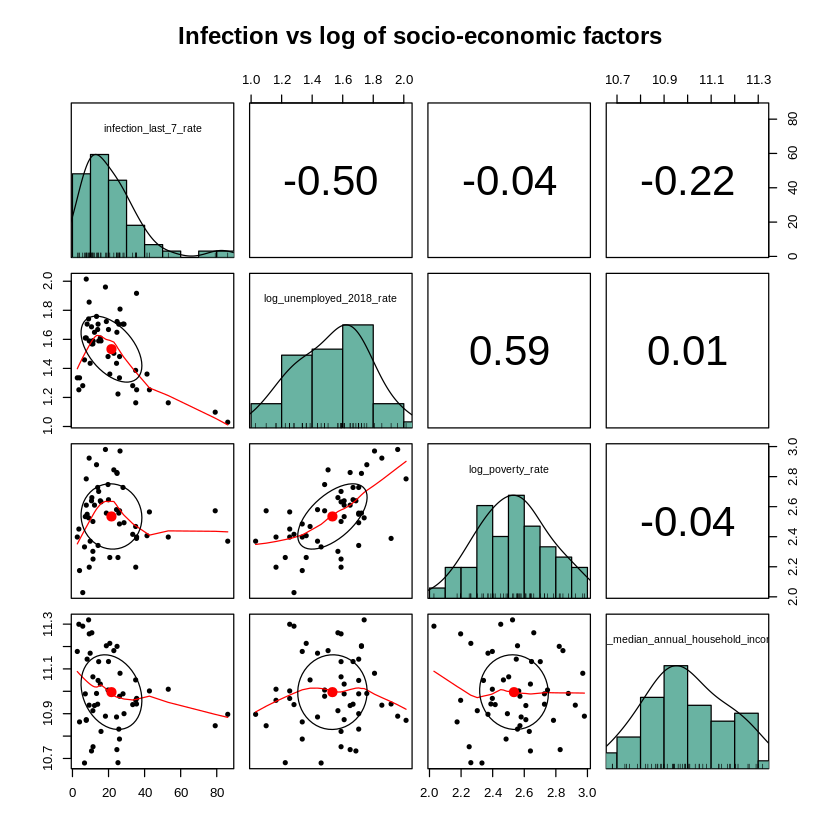

In [11]:
log_economic<-economic%>%
  transmute(infection_last_7_rate=infection_last_7_rate,
    log_unemployed_2018_rate=log(unemployed_2018_rate),log_poverty_rate=log(poverty_rate),
    log_median_annual_household_income=log(median_annual_household_income))  

pairs.panels(log_economic, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs log of socio-economic factors")

**Economic Factor**

1. Socio-Economic variables are approximately normally distributed
2. Both unemployment rate and median household income show moderate correlation with last 7 days infection rate.
3. However, only median household income show some linear relationship between it and outcome variable. 
4. Furthermore, unemployment rate is based on 2018 data, which may have changed in 2020. 
5. In addition, income do play an effect on infection rate as lower income family cannot afford to self quarantine. Therefore, we consider using median household income as a control variable.
6. We notice log(poverty_rate) shows a much stronger correlation with infection than poverty rate, therefore, we decide to use log(poverty_rate).

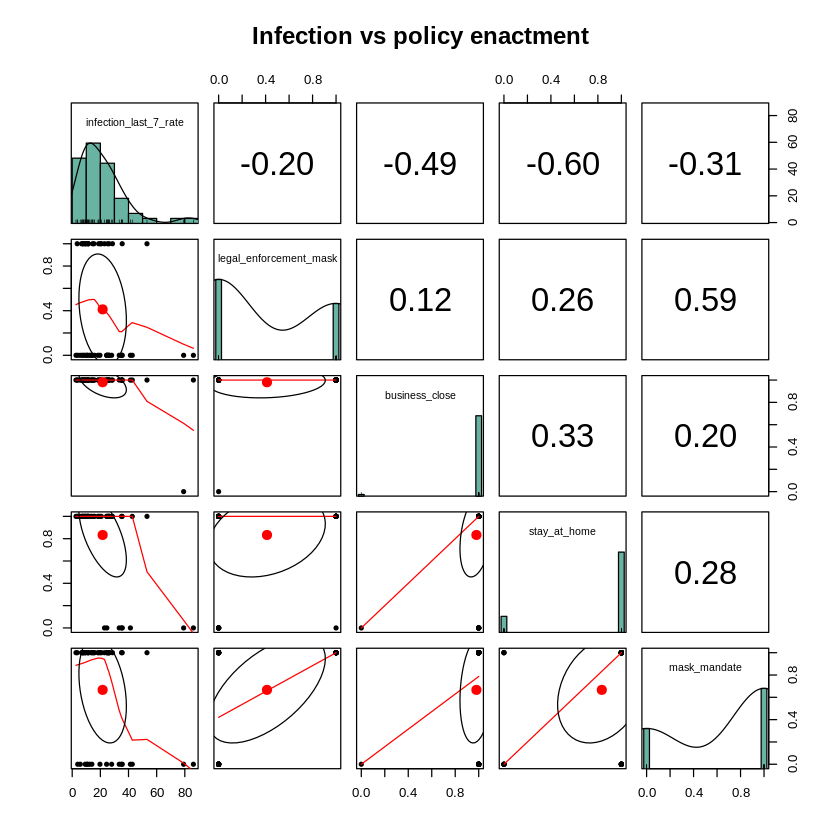

In [12]:
#infection rate vs policy enactment

policy_act<-data%>%
  select(infection_last_7_rate,legal_enforcement_mask,business_close,stay_at_home,mask_mandate)

pairs.panels(policy_act, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs policy enactment")


**State Policy**

1. Binary variables by nature has a linear relationship with outcome variable. 
2. Although **business close** show strong correlation with infection rate, because 50 out of the 51 States enacted business close, we don't have enough variance and degree of freedom to estimate the effect size of **business close** 
4. **legal enforcement** and **mask mandate** are highly related variables, we have to pick one, we picked **mask mandate** because it shows a stronger correlation.
4. Therefore, we will only estimate the effect size of **stay_at_home**, and **mask mandate**

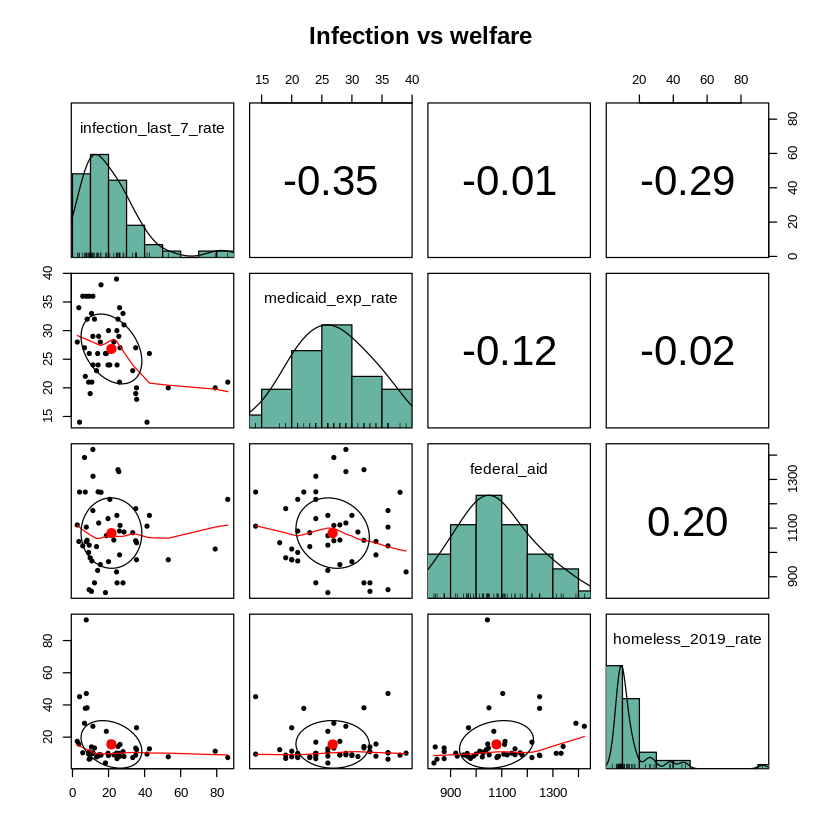

In [13]:
#infection/death rate vs welfare
welfare<-data%>%
  select(infection_last_7_rate,medicaid_exp_rate,federal_aid,homeless_2019_rate) 

pairs.panels(welfare, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs welfare")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.377   2.144   2.303   2.511   2.697   4.531 

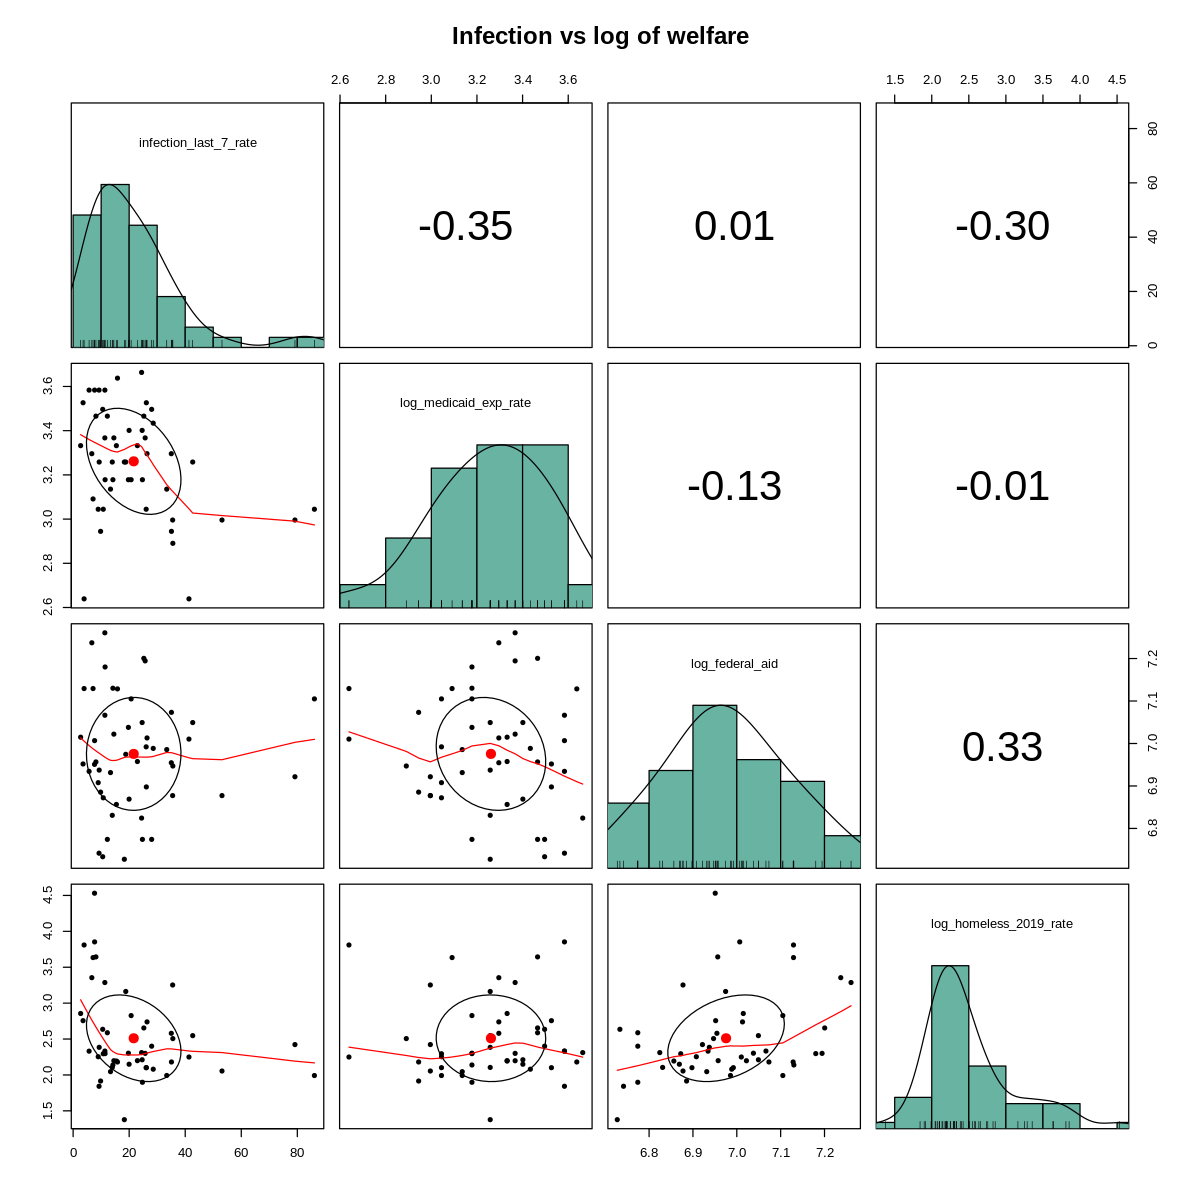

In [23]:
log_welfare<-welfare%>%
  transmute(infection_last_7_rate=infection_last_7_rate,
  log_medicaid_exp_rate=log(medicaid_exp_rate),
  log_federal_aid=log(federal_aid),log_homeless_2019_rate=log(homeless_2019_rate)) 

pairs.panels(log_welfare, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs log of welfare")

summary(log_welfare$log_homeless_2019_rate)

**Homeless Rate**

1. Both medicare expenditure rate and homeless rate show moderate correlation with infection rate
2. However, medicare expendisure rate doesn't seem to have a causal link to infection rate, while homeless rate does to a causal link as they are one of the more volunerable populations
3. After log transformation homeless rate appear to have a more linear relationship with infection rate.
4. Therefore, we will consider it for our control variable.

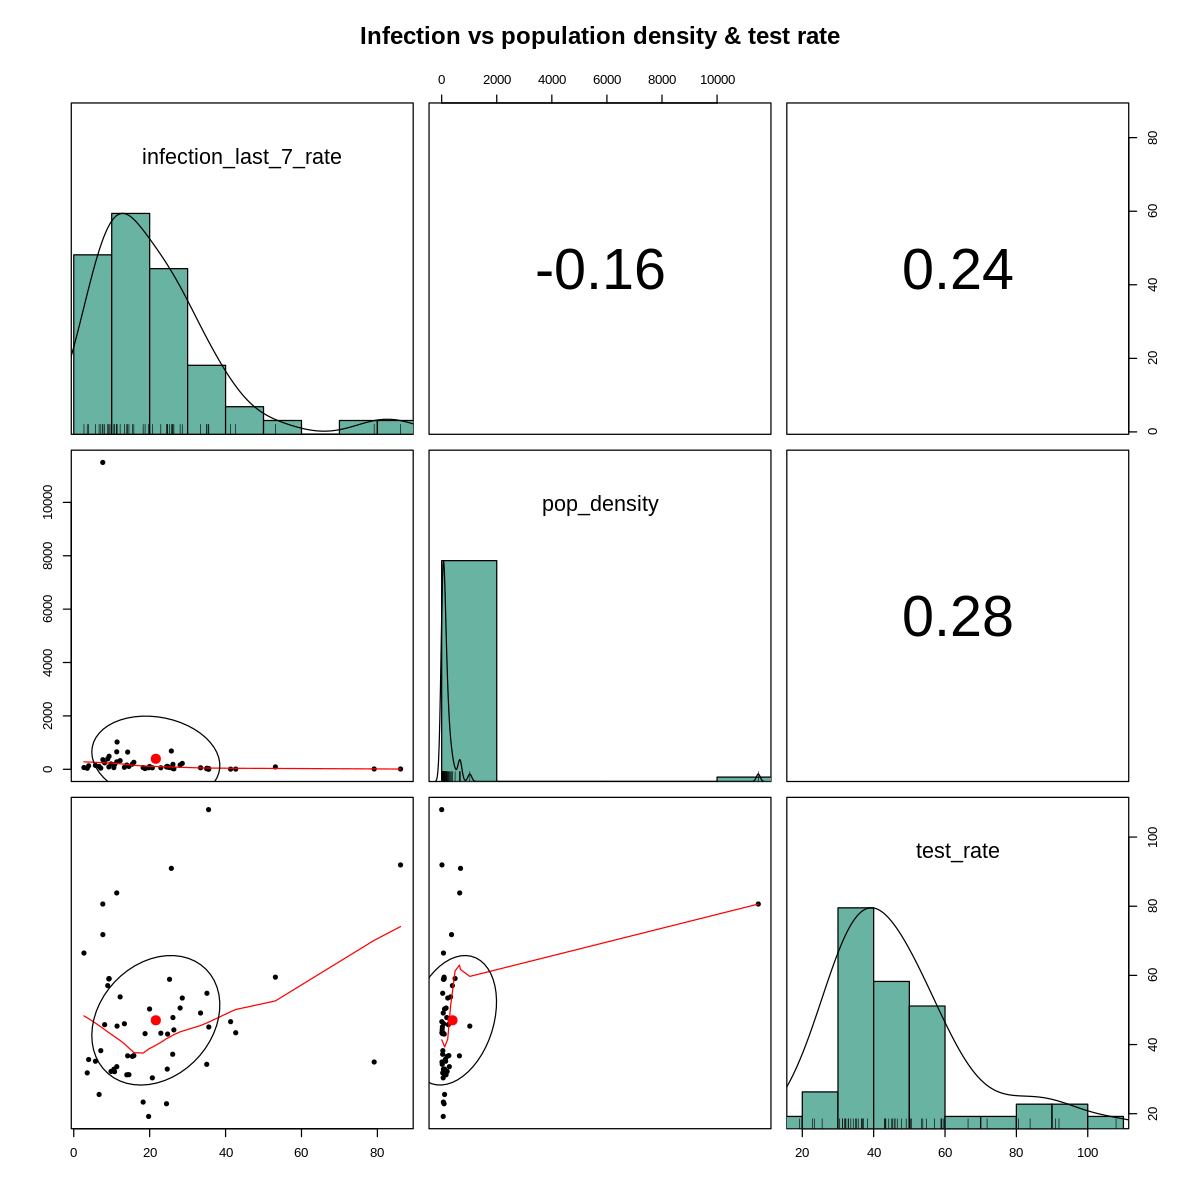

In [24]:
#infection/death rate vs other characteristics
others<-data%>%
  select(infection_last_7_rate,pop_density,test_rate)  

pairs.panels(others, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs population density & test rate")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1044  3.8770  4.5352  4.5474  5.3438  9.3498 

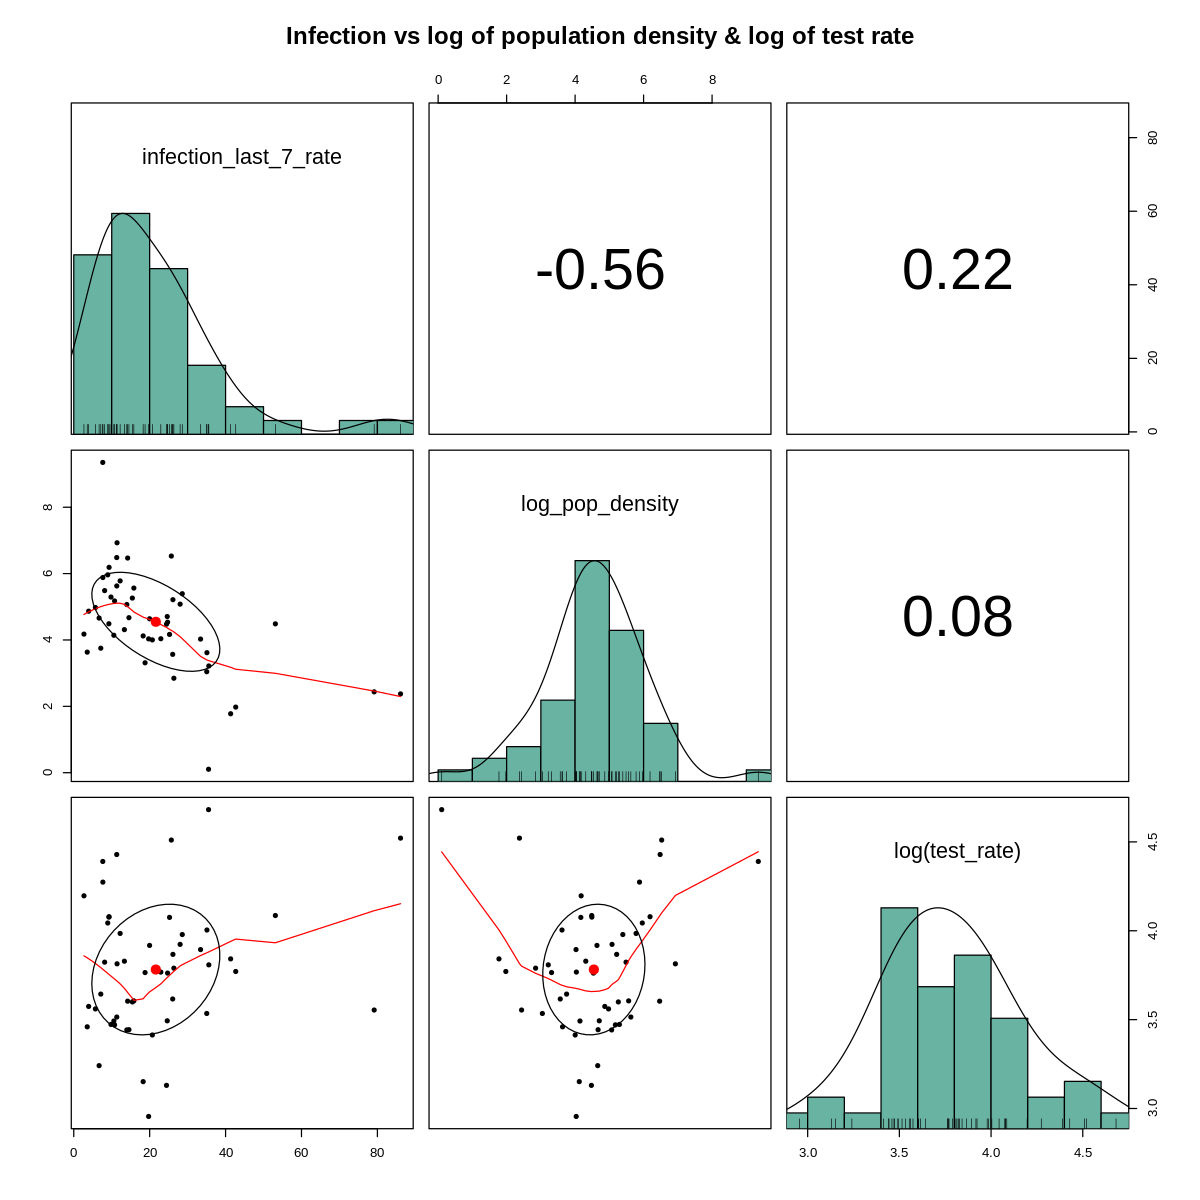

In [26]:
log_others<-others%>%
  transmute(infection_last_7_rate=infection_last_7_rate,
  log_pop_density=log(pop_density),log(test_rate))  
  
pairs.panels(log_others, method = "pearson", hist.col = "#69b3a2",  
main = "Infection vs log of population density & log of test rate")

summary(log_others$log_pop_density)

**Population density**
1. After log transformation pop density shows a strong correlation with infection rate.
2. It also have a causal link with the infection rate
3. Furthermore, it shows a linear relationship with the outcome variable
4. Therefore, we will include it in our control variable. 

**1.4 Feature Extraction**


The X and Y variables are extracted to get summary information.

In [14]:
# Dependent and Independent Variables

y = c("infection_last_7_rate")
X = c("stay_at_home", "mask_mandate", "pop_density", "due_covid_serious_ill_rate", 
    "homeless_2019_rate", "median_annual_household_income")
oth = c("state")
# Extract relevant variables from partially processed data
data_set_core <- data[,c(oth, y, X)]
summary(data_set_core)
head(data_set_core)

    state           infection_last_7_rate  stay_at_home     mask_mandate   
 Length:51          Min.   : 2.682        Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:10.185        1st Qu.:1.0000   1st Qu.:0.0000  
 Mode  :character   Median :18.282        Median :1.0000   Median :1.0000  
                    Mean   :21.621        Mean   :0.8333   Mean   :0.6667  
                    3rd Qu.:26.252        3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :86.097        Max.   :1.0000   Max.   :1.0000  
                                          NA's   :3                        
  pop_density       due_covid_serious_ill_rate homeless_2019_rate
 Min.   :    1.11   Min.   :30.00              Min.   : 3.964    
 1st Qu.:   48.66   1st Qu.:35.95              1st Qu.: 8.534    
 Median :   93.24   Median :38.30              Median :10.002    
 Mean   :  392.64   Mean   :38.15              Mean   :15.517    
 3rd Qu.:  209.56   3rd Qu.:40.65              3rd Qu.:14.842 

state,infection_last_7_rate,stay_at_home,mask_mandate,pop_density,due_covid_serious_ill_rate,homeless_2019_rate,median_annual_household_income
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,24.724466,1,1,93.24,43.1,6.671616,73181
Alaska,35.514850,1,1,1.11,32.8,25.859801,56581
Arizona,10.561034,1,0,62.91,39.1,13.953561,45869
Arkansas,22.940947,0,1,56.67,43.5,9.015122,71805
California,8.135087,1,1,241.65,33.3,38.242998,69117
Colorado,20.703832,1,1,54.72,31.3,16.888582,74168


**1.4.3 Scatterplots of Features**

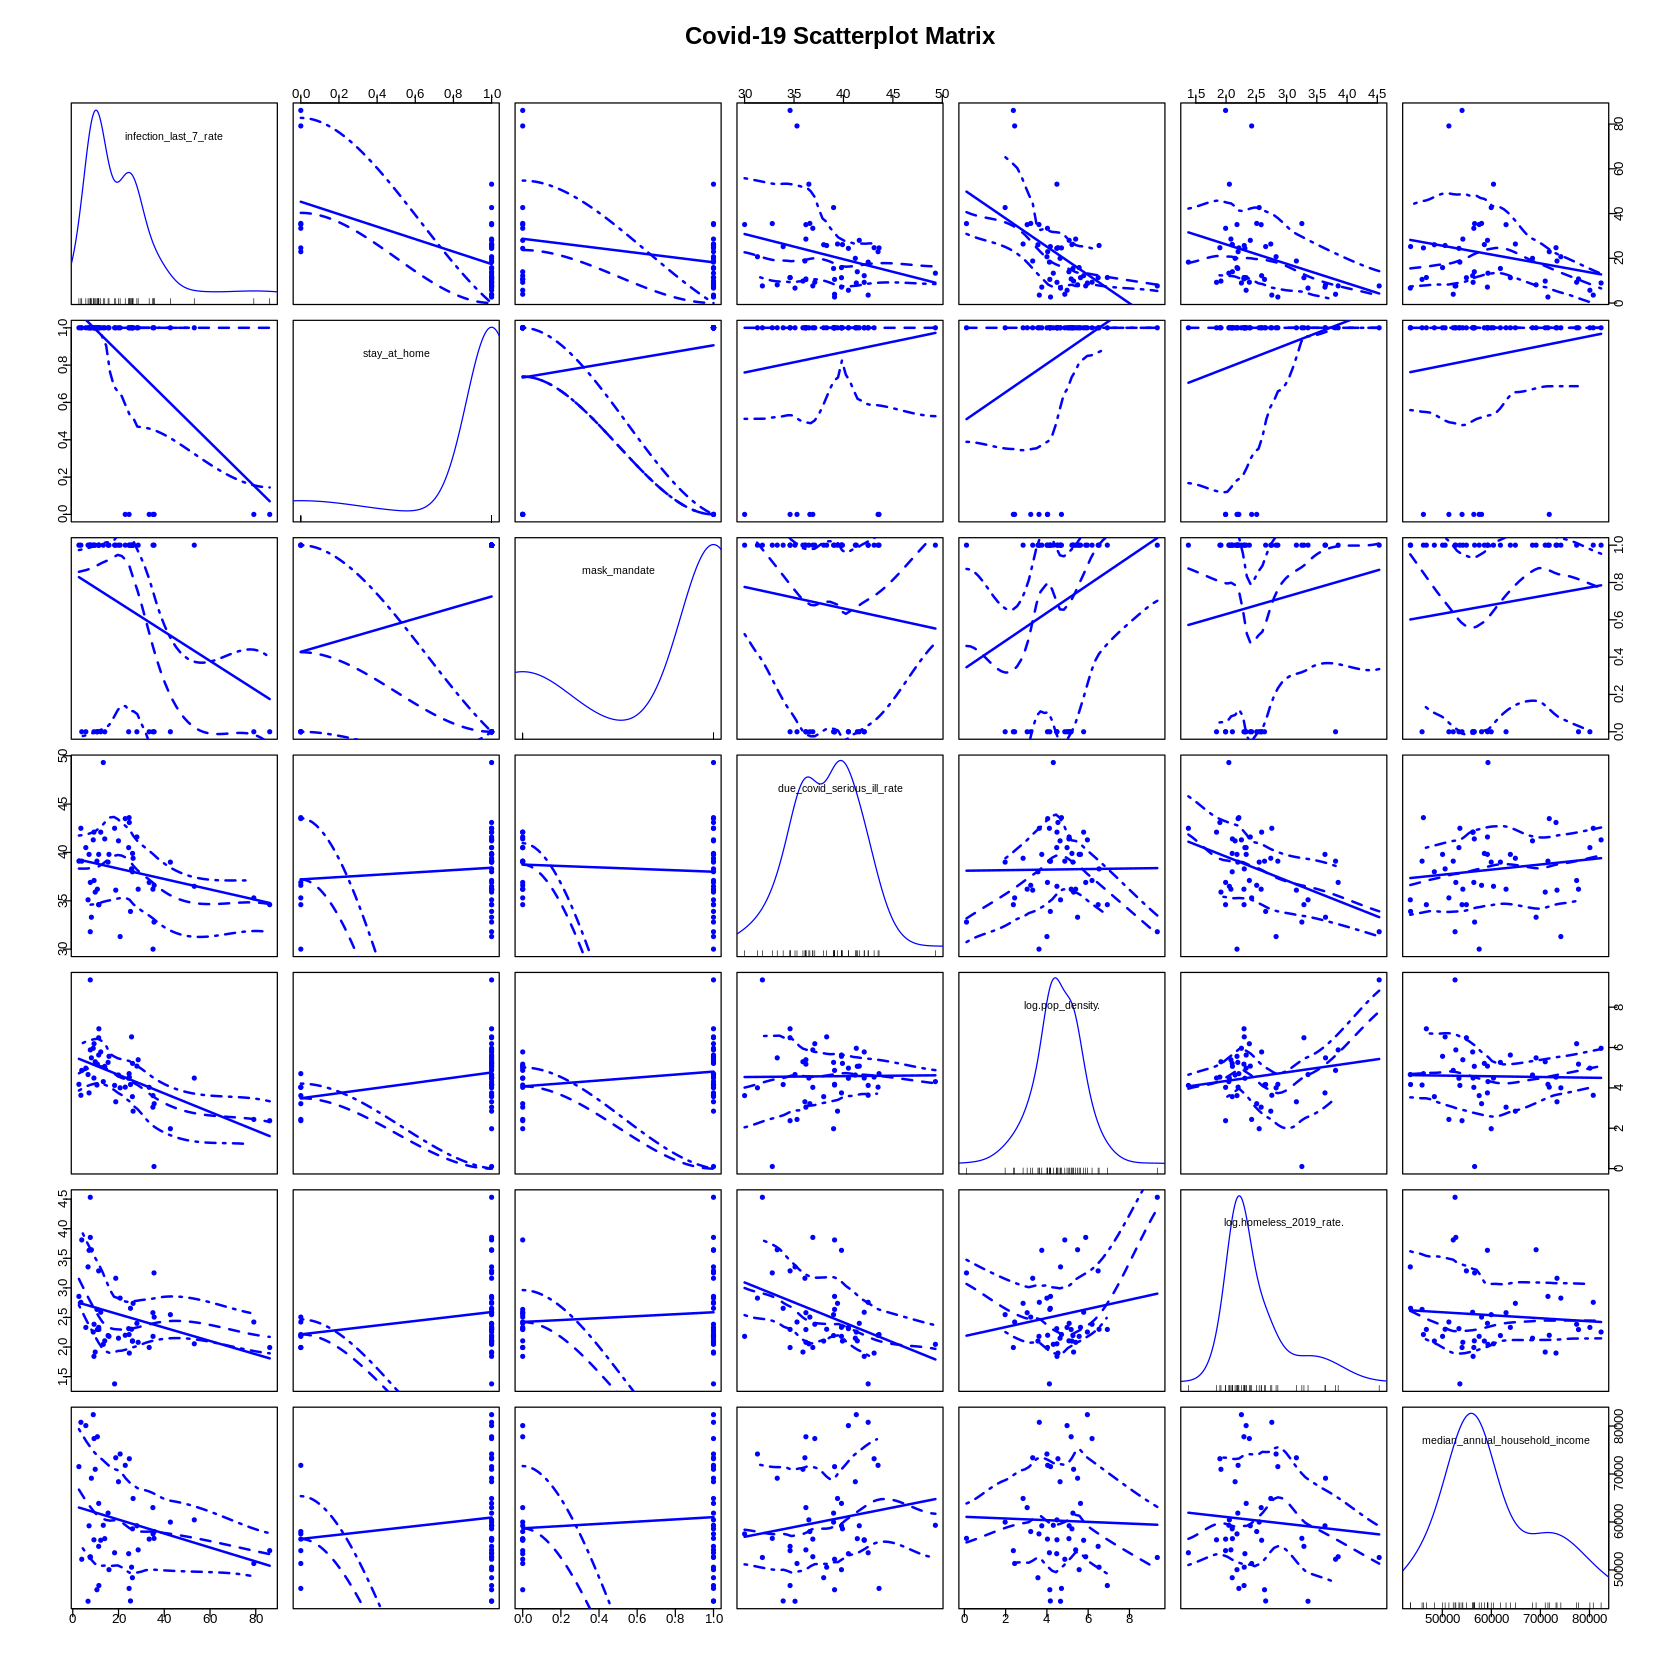

In [17]:
# Scatter Plots

options(repr.plot.height=14, repr.plot.width=14)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))
scatterplotMatrix(~infection_last_7_rate+stay_at_home+mask_mandate+
    due_covid_serious_ill_rate+log(pop_density)+log(homeless_2019_rate)+
    median_annual_household_income, data=data_set_core, pch=20, 
    main="Covid-19 Scatterplot Matrix")


**1.4.4 Check for Measures of Influence**

Cook's distance plot for Measures of Influence



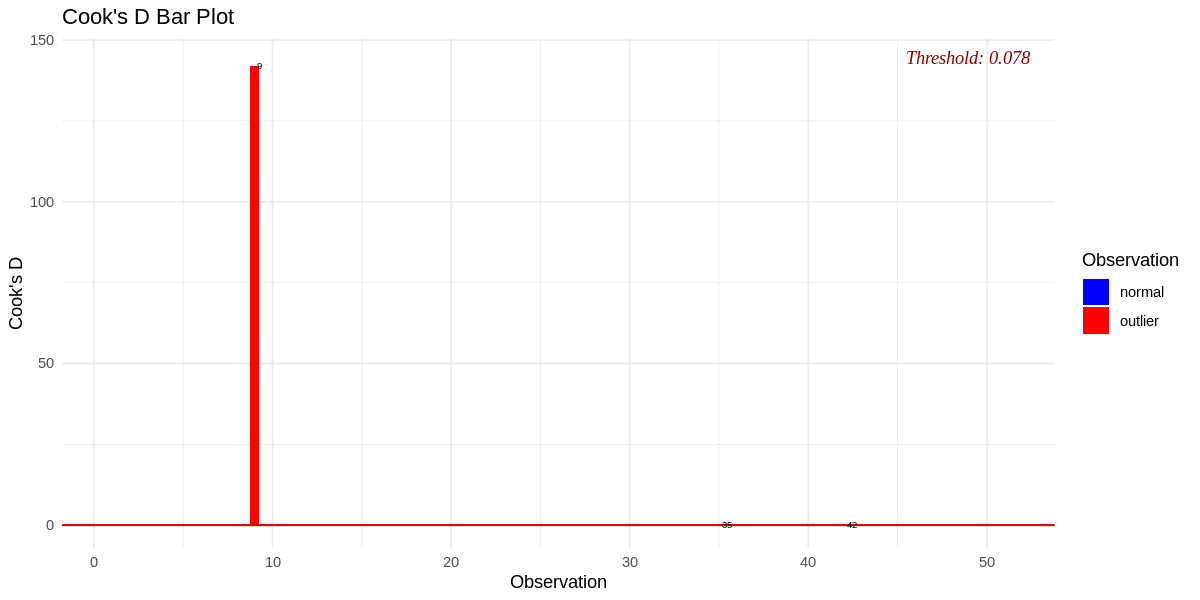

In [18]:
# Check for Measures of Influence

model <- lm(infection_last_7_rate~pop_density, data=data)
cutoff <- 4/((nrow(data) - length(model$coefficients)-2))

writeLines("Cook's distance plot for Measures of Influence\n")

options(repr.plot.height=5, repr.plot.width=10)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))

ols_plot_cooksd_bar(model)


We see that District of Columbia has a lot of influence on the infection rate because of its population density. District of Columbia population density seems to be an outlier. However, we don't want to remove data just because it is skewed, therefore, we ended up log transformed the population density. 

In [20]:
a <- data_set_core %>% 
  mutate(row_num = row_number())
a[c(9), 1:8] 

data <-data[!(data$state == 'District of Columbia'),]

state,infection_last_7_rate,stay_at_home,mask_mandate,pop_density,due_covid_serious_ill_rate,homeless_2019_rate,median_annual_household_income
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
District of Columbia,7.644618,1,1,11496.81,31.8,92.83157,52594


**1.4.4 Correlation Matrix**

In [19]:
# Correlation Matrix

cor(data_set_core[, c("infection_last_7_rate", "stay_at_home", "mask_mandate", 
    "pop_density", "due_covid_serious_ill_rate", "homeless_2019_rate", "median_annual_household_income")])


,infection_last_7_rate,stay_at_home,mask_mandate,pop_density,due_covid_serious_ill_rate,homeless_2019_rate,median_annual_household_income
infection_last_7_rate,1.0000000,NA,-0.3095522,-0.1590861,-0.2370586,-0.2893784,NA
stay_at_home,NA,1,NA,NA,NA,NA,NA
mask_mandate,-0.3095522,NA,1.0000000,0.1351652,-0.1130699,0.1475196,NA
pop_density,-0.1590861,NA,0.1351652,1.0000000,-0.2584800,0.7439703,NA
due_covid_serious_ill_rate,-0.2370586,NA,-0.1130699,-0.2584800,1.0000000,-0.3445115,NA
homeless_2019_rate,-0.2893784,NA,0.1475196,0.7439703,-0.3445115,1.0000000,NA
median_annual_household_income,NA,NA,NA,NA,NA,NA,1


**1.4.5. Distribution of Dependent and Independent Variables** 

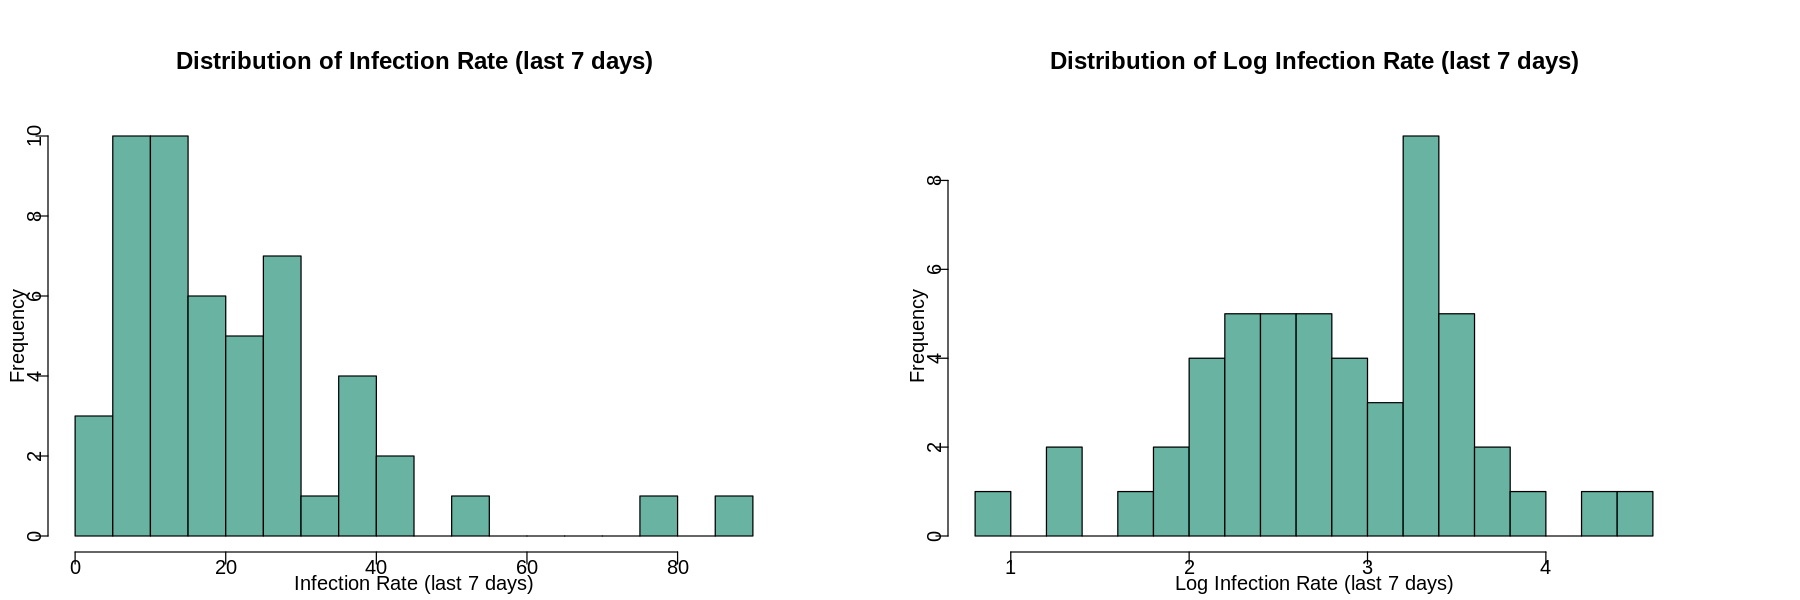

In [21]:
options(repr.plot.height=5, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))
# Distribution of Dependent Variable - Infection Rate (last 7 days)
hist(data_set_core$infection_last_7_rate, main="Distribution of Infection Rate (last 7 days)", 
    xlab="Infection Rate (last 7 days)", breaks=20, col="#69b3a2")
hist(log(data_set_core$infection_last_7_rate), main="Distribution of Log Infection Rate (last 7 days)", 
    xlab="Log Infection Rate (last 7 days)", breaks=20, col="#69b3a2")

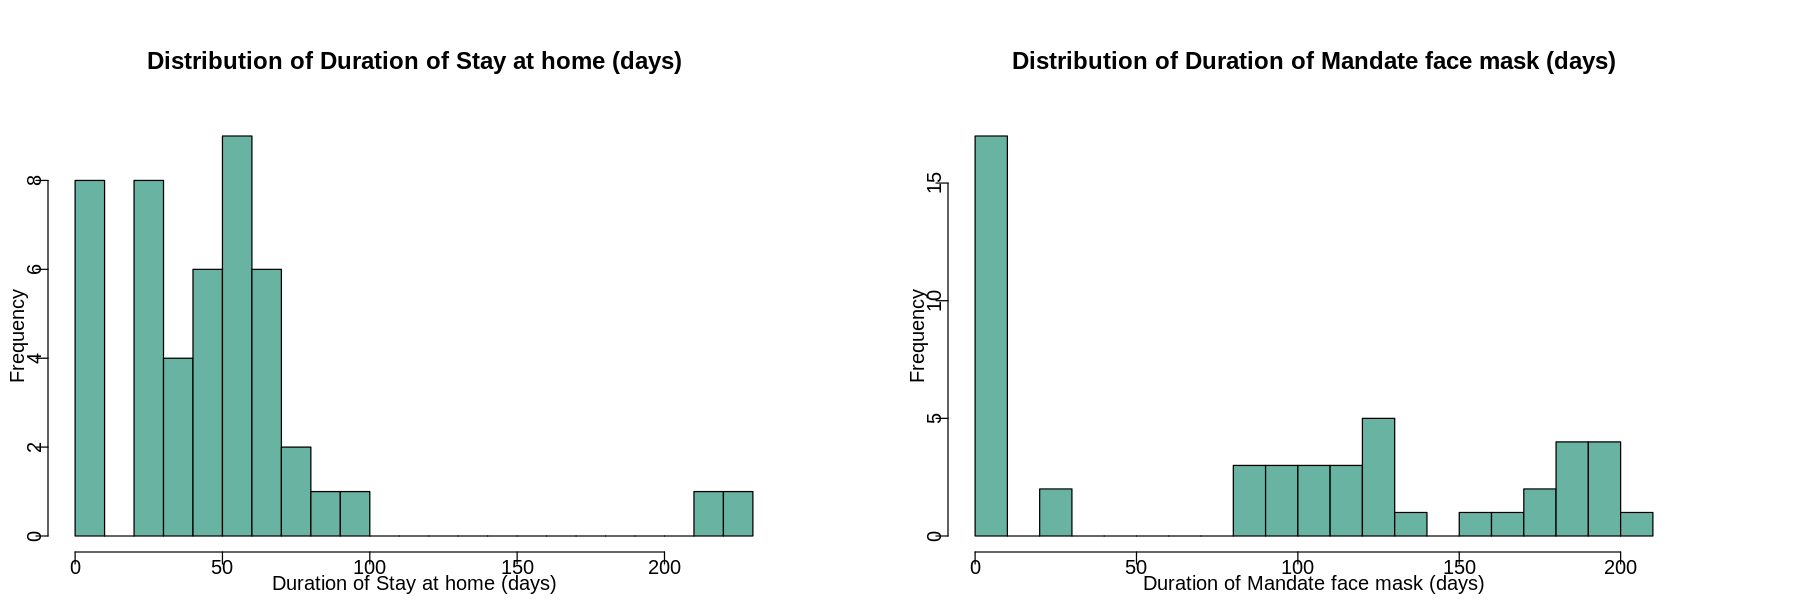

In [22]:
options(repr.plot.height=5, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))
# Histograms of stay at home and mask mandate durations 
hist(data$stay_at_home_duration, main="Distribution of Duration of Stay at home (days)", 
    xlab="Duration of Stay at home (days)", breaks=20, col="#69b3a2")
hist(data$mask_mandate_duration, main="Distribution of Duration of Mandate face mask (days)", 
    xlab="Duration of Mandate face mask (days)", breaks=20, col="#69b3a2")

Some of the states do not have shelter in place or mask mandates which is why the duration is zero for these states.

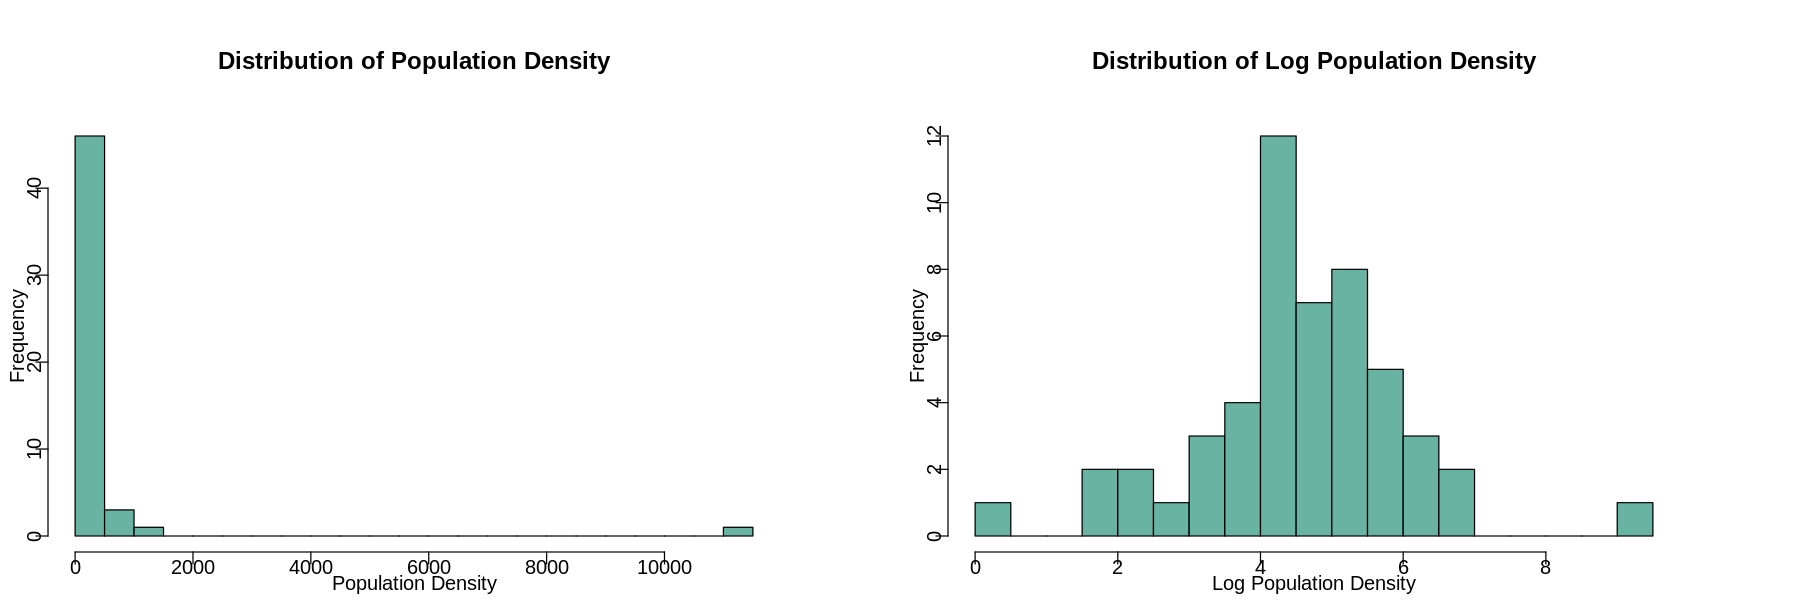

In [24]:
options(repr.plot.height=5, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))
# Distribution of Independent Variable - Population Density
hist(data_set_core$pop_density, main="Distribution of Population Density", 
    xlab="Population Density", breaks=20, col="#69b3a2")
hist(log(data_set_core$pop_density), main="Distribution of Log Population Density", 
    xlab="Log Population Density", breaks=20, col="#69b3a2")

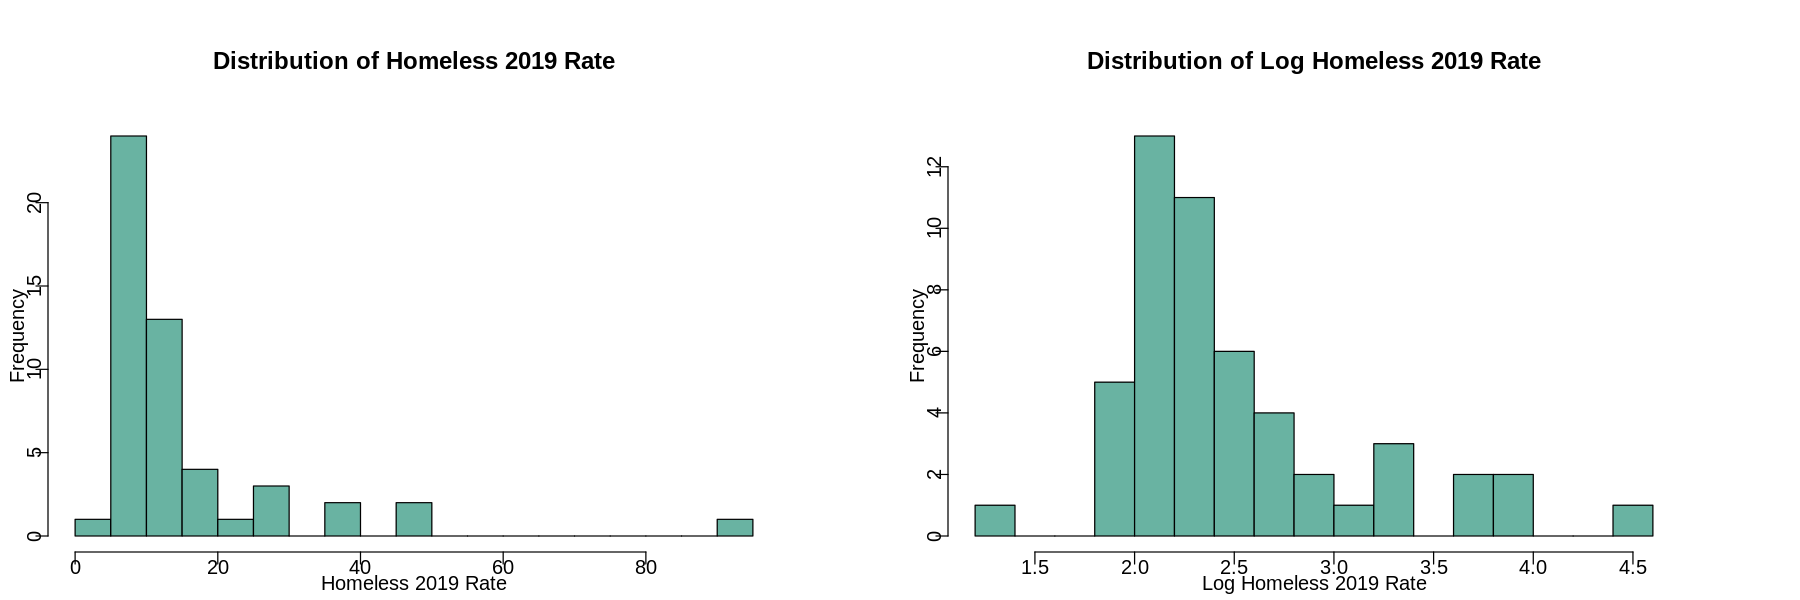

In [25]:
options(repr.plot.height=5, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))
# Distribution of Independent Variable - Homeless 2019 Rate
hist(data_set_core$homeless_2019_rate, main="Distribution of Homeless 2019 Rate", 
    xlab="Homeless 2019 Rate", breaks=20, col="#69b3a2")
hist(log(data_set_core$homeless_2019_rate), main="Distribution of Log Homeless 2019 Rate", 
    xlab="Log Homeless 2019 Rate", breaks=20, col="#69b3a2")

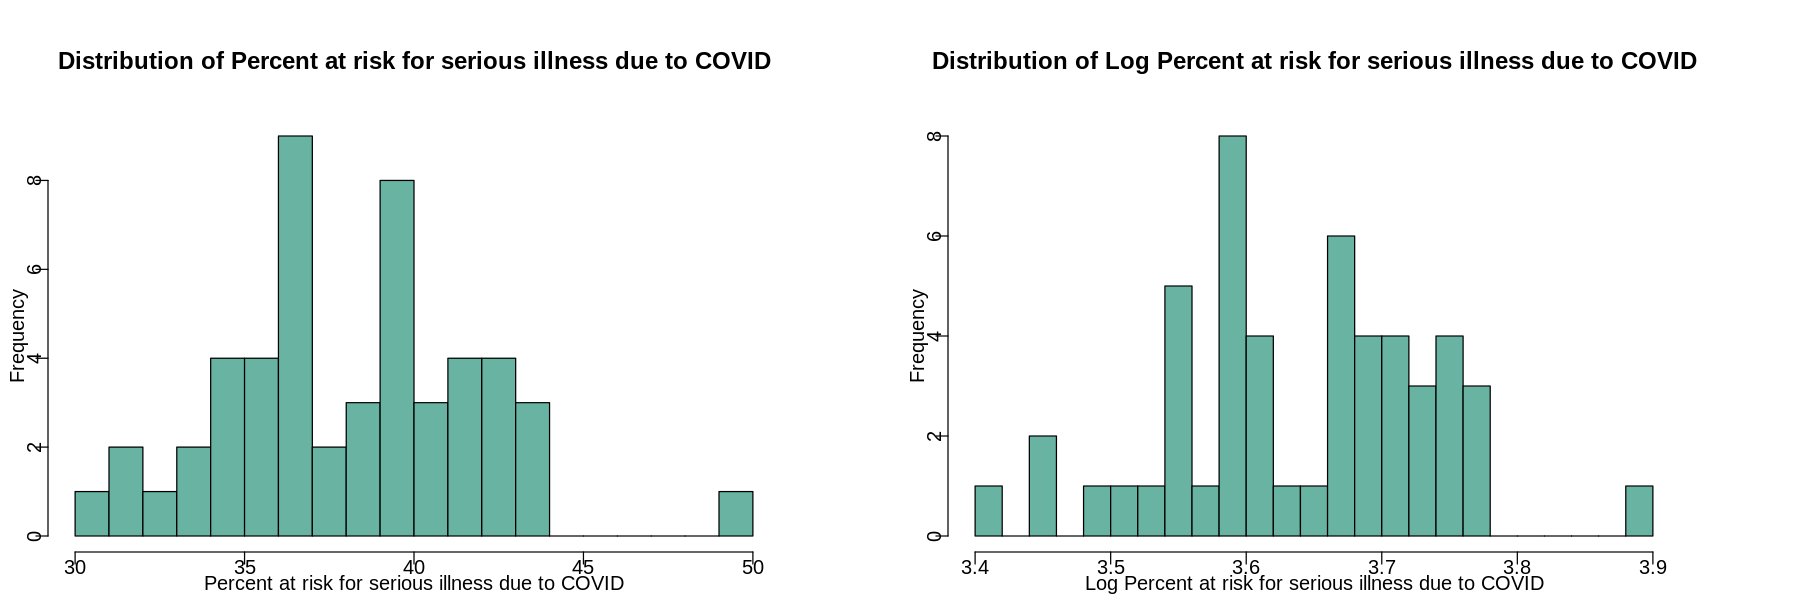

In [26]:
options(repr.plot.height=5, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))

# Distribution of Independent Variable - Percent at risk for serious illness due to COVID
hist(data_set_core$due_covid_serious_ill_rate, 
    main="Distribution of Percent at risk for serious illness due to COVID", 
    xlab="Percent at risk for serious illness due to COVID", breaks=20, col="#69b3a2")
hist(log(data_set_core$due_covid_serious_ill_rate), 
    main="Distribution of Log Percent at risk for serious illness due to COVID", 
    xlab="Log Percent at risk for serious illness due to COVID", breaks=20, col="#69b3a2")

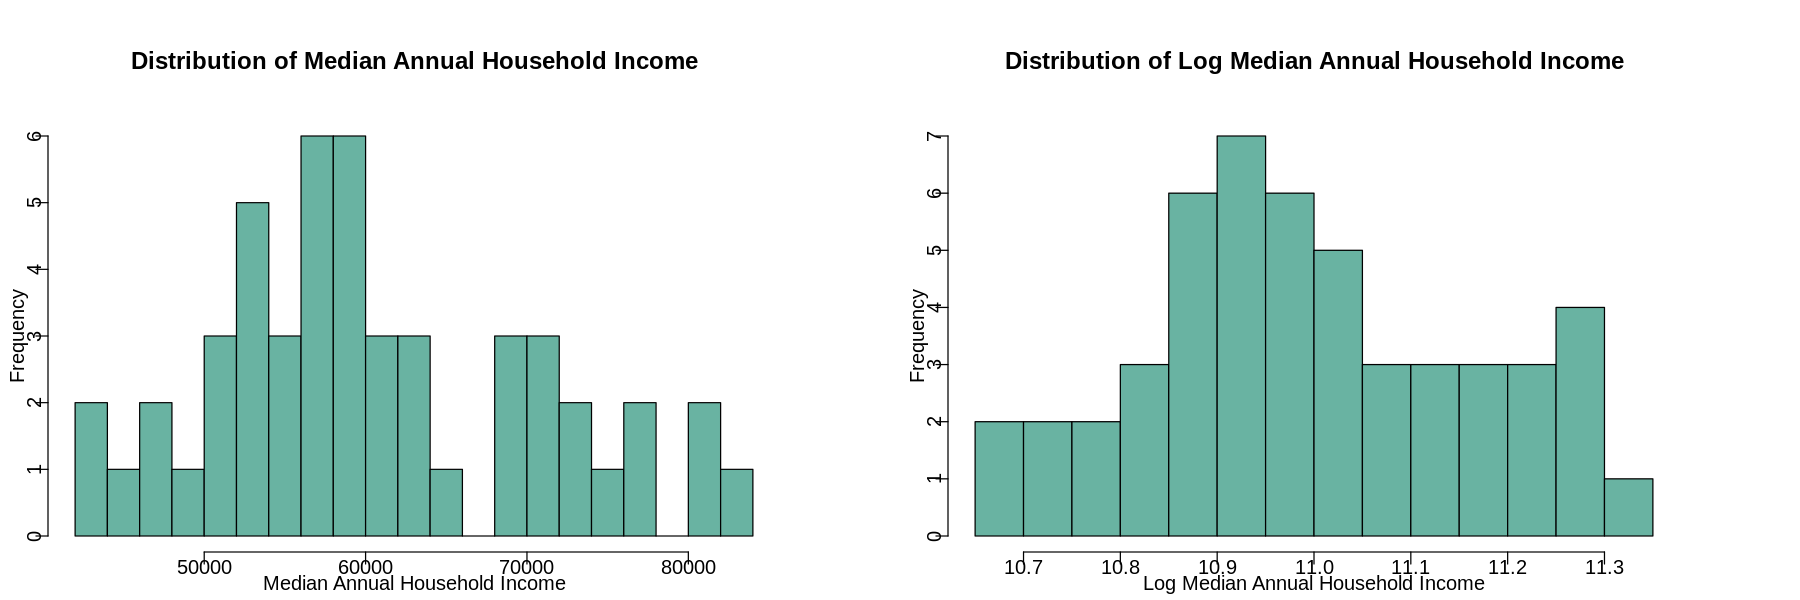

In [27]:
options(repr.plot.height=5, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))

# Distribution of Independent Variable - Median Annual Household Income
hist(data_set_core$median_annual_household_income, main="Distribution of Median Annual Household Income", 
    xlab="Median Annual Household Income", breaks=20, col="#69b3a2")
hist(log(data_set_core$median_annual_household_income), main="Distribution of Log Median Annual Household Income", 
    xlab="Log Median Annual Household Income", breaks=20, col="#69b3a2")

Based on the above histograms, the distributions of Population Density and Homeless Rate are skewed to the right. It is appropriate to take log transformations of pop_density, and homeless_2019 to make the distribution symmetric. Other variables do not seem to be too skewed and their distributions seem to be fairly symmetric.

# **2. Model Building Process**

*What do you want to measure? Make sure you identify one, or a few, variables
that will allow you to derive conclusions relevant to your research question, and include those variables in all model specifications.*

The variables that we want to measure are provided in section 1.1 of this document and listed below:


> Cases in Last 7 Days



*Is your modeling goal one of description or explanation?*

Our modeling goal is that of explanation.

*What covariates help you achieve your modeling goals? What covariates are problematic, either due to collinearity, or because they are outcomes that will absorb some of a causal effect you want to measure?*

The covariates that will help achieve our modeling goals are as follows:

> Stay at home/ shelter in place


> Mandate face mask use by all individuals in public spaces


> Population density per square miles


> Percent at risk for serious illness due to COVID


> Number Homeless (2019)


> Median Annual Household Income



*What transformations, if any, should you apply to each variable? These transformations might reveal linearities in scatterplots, make your results relevant, or help you meet model assumptions.*

We will apply log transformations for the following covariates:

> Population density per square miles

> Number Homeless (2019)



*Are your choices supported by exploratory data analysis (EDA)? You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be interspersed with your model building. Use visual tools to guide your decisions. You can also leverage statistical tests to help assess whether variables, or groups of variables, are improving model fit.* 








**2.1 Model-1: With Key Variables** 






In [28]:
#Model Selection - With Key Variables
model_11=lm(infection_last_7_rate~stay_at_home, data=data, na.action=na.exclude)
coeftest(model_11, vcov = vcovHC)

model_12=lm(infection_last_7_rate~mask_mandate, data=data, na.action=na.exclude)
coeftest(model_12, vcov = vcovHC)

model_13=lm(infection_last_7_rate~legal_enforcement_mask, data=data, na.action=na.exclude)
coeftest(model_13, vcov = vcovHC)

model_14=lm(infection_last_7_rate~stay_at_home+mask_mandate, data=data, na.action=na.exclude)
coeftest(model_14, vcov = vcovHC)

get_robust_se <- function(model) { 
  rse <- sqrt(diag(vcovHC(model)))
  return(rse)
}


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   44.7788     9.1374  4.9006 1.28e-05 ***
stay_at_home -27.1291     9.3222 -2.9102 0.005598 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   28.9326     5.9499  4.8627 1.285e-05 ***
mask_mandate -10.6547     6.2455 -1.7060   0.09447 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             24.4678     3.6012  6.7943 1.52e-08 ***
legal_enforcement_mask  -6.4182     4.4993 -1.4265   0.1602    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   46.8544     9.3934  4.9880 1.003e-05 ***
stay_at_home -25.2309     8.7136 -2.8956  0.005873 ** 
mask_mandate  -5.5351     4.8945 -1.1309  0.264230    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [29]:
#Review models using Stargazer - With Key Variables
stargazer(model_11,model_12,model_13,model_14,
          type="text",
          se = list(get_robust_se(model_11),get_robust_se(model_12),get_robust_se(model_13),
          get_robust_se(model_14)),
          column.labels = c("Stay at home","Mask Mandate","Legal Enforcement","Final"),
          star.cutoffs = c(0.05, 0.01, 0.001), 
          title = "Table 1: Which Policys Best Explain the Change in Infection Rate"
          )


Table 1: Which Policys Best Explain the Change in Infection Rate
                                                       Dependent variable:                                 
                       ------------------------------------------------------------------------------------
                                                      infection_last_7_rate                                
                            Stay at home         Mask Mandate     Legal Enforcement          Final         
                                (1)                   (2)                (3)                  (4)          
-----------------------------------------------------------------------------------------------------------
stay_at_home                 -27.129**                                                     -25.231**       
                              (9.322)                                                       (8.714)        
                                                                      

In our causal theory, we want to look at the effect of different states' policies on the recent weekly infection rate. Within the limit of the data, we have 4 policies: **stay_at_home, close_business, mask_mandate, legal_enforcement_of_mask_mandate**. From EDA, we already know that we cannot use close business, because 50 out of 51 States had close business policy, therefore there is no enough degrees of freedom to estimate the effect of close business. Mask mandate and its legal enforcement are really part of the same policy, therefore we have to pick one or the another in order to correctly measure the impact of the policy. Looking at their p value for their coefficients, we see that mask mandate has a more significant coefficient. Therefore, in our final version of the **Model-1**, we will include both stay at home and mask mandate and measure their effect on the recent weekly infection rate. 

Notice here that the beta for mask mandate is insignificant even though mask has scientifically proven to be effective. We will discuss why the beta is insignificant in a later section. 

**2.2 Model-2: With Key Variables and Covariates**






In [32]:
# Model Selection - With Key Variables and Covariates
# key variables (policies)
model_21=lm(infection_last_7_rate~stay_at_home+mask_mandate, 
        data=data, na.action=na.exclude
        )
coeftest(model_21, vcov = vcovHC)

#add serious ill rate
model_22=lm(infection_last_7_rate~stay_at_home+mask_mandate+due_covid_serious_ill_rate,
        data=data, na.action=na.exclude
        )
coeftest(model_22, vcov = vcovHC)

#add population density
model_23=lm(infection_last_7_rate~stay_at_home+mask_mandate+due_covid_serious_ill_rate+
        log(pop_density), 
        data=data, na.action=na.exclude
        )
coeftest(model_23, vcov = vcovHC)

#add homeless_2019_rate & median_annual_household_income
model_24=lm(infection_last_7_rate~stay_at_home+mask_mandate+due_covid_serious_ill_rate+
        log(pop_density)+log(homeless_2019_rate)+median_annual_household_income, 
        data=data, na.action=na.exclude
        )
coeftest(model_24, vcov = vcovHC)



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   46.8544     9.3934  4.9880 1.003e-05 ***
stay_at_home -25.2309     8.7136 -2.8956  0.005873 ** 
mask_mandate  -5.5351     4.8945 -1.1309  0.264230    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                 87.17036   24.99534  3.4875 0.001137 **
stay_at_home               -23.35119    7.84743 -2.9756 0.004783 **
mask_mandate                -6.36479    4.74626 -1.3410 0.186958   
due_covid_serious_ill_rate  -1.07793    0.54437 -1.9801 0.054110 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 92.86805   22.09967  4.2022 0.0001349 ***
stay_at_home               -18.18419    6.87638 -2.6444 0.0114582 *  
mask_mandate                -4.04084    4.03056 -1.0026 0.3218186    
due_covid_serious_ill_rate  -0.84981    0.44269 -1.9196 0.0617122 .  
log(pop_density)            -4.59232    1.26887 -3.6192 0.0007880 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

                                  Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)                     1.5663e+02  3.1963e+01  4.9003 1.715e-05 ***
stay_at_home                   -1.3444e+01  7.1665e+00 -1.8759 0.0681643 .  
mask_mandate                   -3.6068e+00  3.8807e+00 -0.9294 0.3583831    
due_covid_serious_ill_rate     -1.3659e+00  5.2111e-01 -2.6211 0.0124312 *  
log(pop_density)               -5.4896e+00  1.2979e+00 -4.2298 0.0001369 ***
log(homeless_2019_rate)        -1.1100e+01  3.3399e+00 -3.3234 0.0019418 ** 
median_annual_household_income -2.7009e-04  1.2824e-04 -2.1061 0.0416826 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [33]:
#Review models using Stargazer - Second Model
stargazer(model_21,model_22,model_23,model_24,
          type="text",
          se = list(get_robust_se(model_21),get_robust_se(model_22),get_robust_se(model_23),
                    get_robust_se(model_24)),
          column.labels = c("Model-21","Model-22","Model-23","Model-24"),
          star.cutoffs = c(0.05, 0.01, 0.001), 
          title = "Table 2: Adding Race, Wealth, Baseline as Controls"
          )



Table 2: Adding Race, Wealth, Baseline as Controls
                                                                   Dependent variable:                                    
                               -------------------------------------------------------------------------------------------
                                                                  infection_last_7_rate                                   
                                      Model-21               Model-22               Model-23               Model-24       
                                        (1)                    (2)                    (3)                    (4)          
--------------------------------------------------------------------------------------------------------------------------
stay_at_home                         -25.231**              -23.351**              -18.184**               -13.444        
                                      (8.714)                (7.847)                (6.

**2.3.1 Model-2: Wald test to check for joint significance of policy features**

We used Wald test to check if addition of population density to Model-22 resulted in any statistically significant improvement in Model-23. Reviewing the p-value (0.0007879577) we reject the null hypothesis that addition of this feature does not improve Model-22. We decided to add population density in Model-24.

In [35]:
# Test to check if addition of policy related features are jointly significant
waldtest(model_22, model_23, vcov = vcovHC)

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,43,NA,NA,NA
2,42,1,13.09878,0.0007879577


**2.3 Model-3: With Key Variables and many Covariates**



In [36]:
# Model 3
#add race, age, and test rate
model_31=lm(infection_last_7_rate~stay_at_home+mask_mandate+due_covid_serious_ill_rate+
        log(pop_density)+log(homeless_2019_rate)+median_annual_household_income+
        log(poverty)+white_pop_rate+black_pop_rate+hispanic_pop_rate+
        pop_under18+pop_19_25+pop_26_34+pop_35_54+pop_54_64, 
        data=data, na.action=na.exclude
        )
coeftest(model_31, vcov = vcovHC)



t test of coefficients:

                                  Estimate  Std. Error t value Pr(>|t|)  
(Intercept)                     2.0032e+02  8.1204e+01  2.4669  0.02001 *
stay_at_home                   -1.1620e+01  7.0320e+00 -1.6524  0.10962  
mask_mandate                   -3.0939e+00  5.3948e+00 -0.5735  0.57089  
due_covid_serious_ill_rate     -1.5649e+00  6.5733e-01 -2.3807  0.02432 *
log(pop_density)               -6.8720e+00  3.2559e+00 -2.1107  0.04386 *
log(homeless_2019_rate)        -2.3472e+01  9.9259e+00 -2.3648  0.02521 *
median_annual_household_income -2.6238e-04  2.3508e-04 -1.1161  0.27385  
log(poverty)                    1.9400e+00  7.0929e+00  0.2735  0.78647  
white_pop_rate                 -2.0844e-01  3.3109e-01 -0.6296  0.53408  
black_pop_rate                 -5.2421e-01  5.8894e-01 -0.8901  0.38100  
hispanic_pop_rate              -3.0992e-01  4.9518e-01 -0.6259  0.53647  
pop_under18                    -9.1984e-05  5.3627e-05 -1.7153  0.09735 .
pop_19_25   

In [37]:
#Review models using Stargazer - With Key Variables and many Covariates
stargazer(model_24,model_31,
          type="text",
          se = list(get_robust_se(model_24),get_robust_se(model_31)
                    ),
          column.labels = c("Model-24","Overfitted"),
          star.cutoffs = c(0.05, 0.01, 0.001), 
          title = "Table 3: Model-24 vs Overfitted Model"
          )


Table 3: Model-24 vs Overfitted Model
                                            Dependent variable:             
                               ---------------------------------------------
                                           infection_last_7_rate            
                                      Model-24              Overfitted      
                                        (1)                    (2)          
----------------------------------------------------------------------------
stay_at_home                          -13.444                -11.620        
                                      (7.167)                (7.032)        
                                                                            
mask_mandate                           -3.607                 -3.094        
                                      (3.881)                (5.395)        
                                                                            
due_covid_serious_ill_rate           

In model 3, we overfit the model2 with additional control variables like race, age, and test rate. We see that when we ovefit the model, both the standard error and p-value increases, making our coefficients insignificant. This is due to less degree of freedom, and less unique variance for each variable. Therefore, overfitting a model actually decrease our statistical power to detect the significant coefficients. 

However, overfit does allow us to see wether our coefficients are robust, we see that even after adding these controls our coefficients for **stay at home and mask mandate** are still pretty similar to before. This gives us more confidence that our estimate for the policy effect size is within a reasonable range.   

# **3. Limitations of Model - Model_24**




**3.1 Assumption-1: Linear population model**

Looking at the model's residual against the predictive error and each variables in the model, we see that overall the relationship is pretty linear except for at extreme ends of the parameters. Furthermore our key explanatory variables **stay at home** and **mask mandate** are very linear, therefore their coefficients are not statistically biased. 

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”
Warning message in simpleLoes

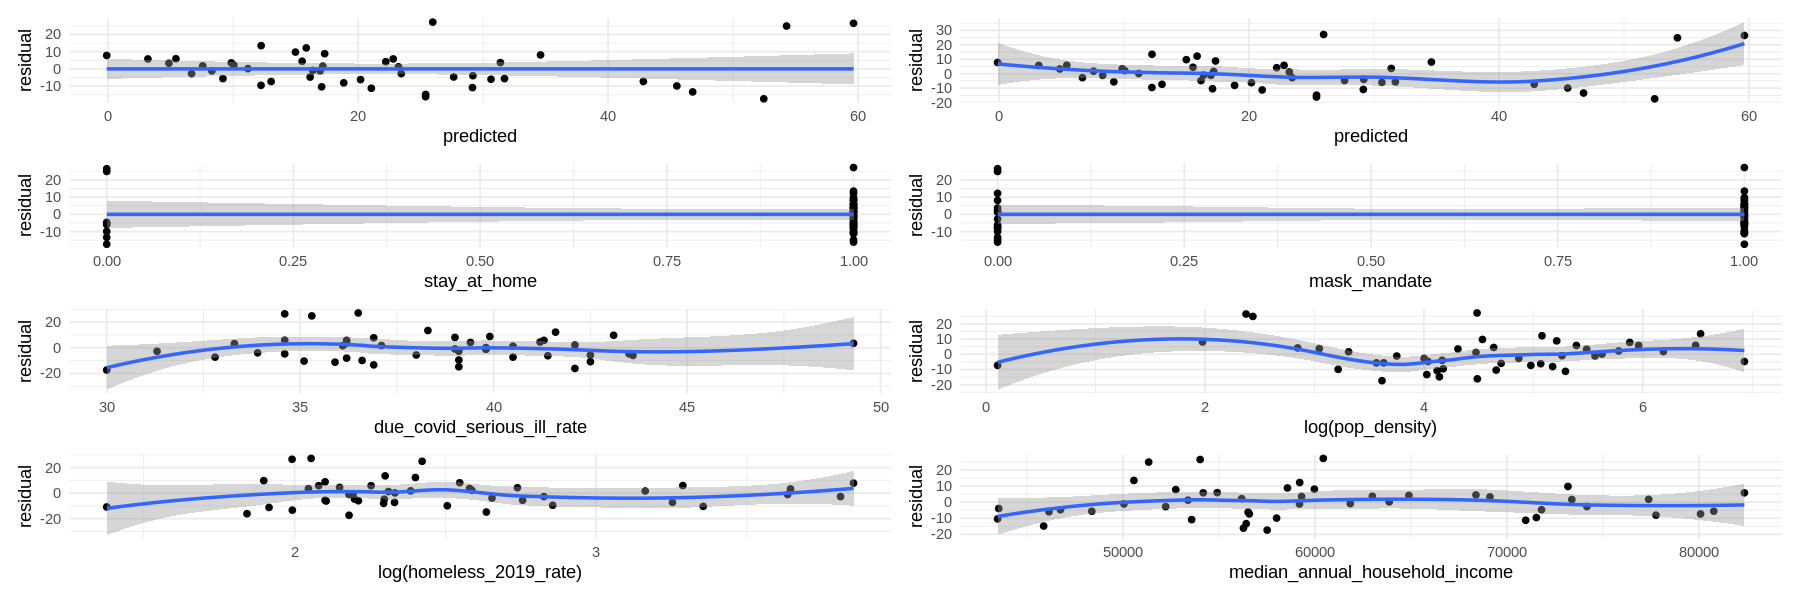

In [39]:
data <- data %>%  
  mutate(residual = resid(model_24),
         predicted = predict(model_24)
        )

plot_1 <- data %>%  
  ggplot(aes(x = predicted, y = residual)) + 
  geom_point() + geom_smooth(method = 'lm')

plot_2 <- data %>%  
  ggplot(aes(x = predicted, y = residual)) + 
  geom_point() + stat_smooth()

plot_3 <- data %>%  
  ggplot(aes(x = stay_at_home, y = residual )) + 
  geom_point() + geom_smooth(method = 'lm')

plot_4 <- data %>%  
  ggplot(aes(x = mask_mandate, y = residual)) + 
  geom_point() + stat_smooth()

plot_5 <- data %>%  
  ggplot(aes(x = due_covid_serious_ill_rate, y = residual)) + 
  geom_point() + stat_smooth()

plot_6 <- data %>%  
  ggplot(aes(x = log(pop_density), y = residual)) + 
  geom_point() + stat_smooth()

plot_7 <- data %>%  
  ggplot(aes(x = log(homeless_2019_rate) , y = residual)) + 
  geom_point() + stat_smooth()

plot_8 <- data %>%  
  ggplot(aes(x = median_annual_household_income , y = residual)) + 
  geom_point() + stat_smooth()

(plot_1 | plot_2) / 
(plot_3 | plot_4) /
(plot_5 | plot_6) /
(plot_7 | plot_8)

**3.2 Assumption-2: Random Sampling**

The data is obtained from COVID-19 US state policy database (CUSP) (Raifman J, Nocka K, Jones D, Bor J, Lipson S, Jay J, and Chan P. (2020). " Available at: www.tinyurl.com/statepolicies). The data is for all 50 states in the US and the District of Columbia. Because we have the **entire population** in our data, our data should have the same characteristic as the entire population. However there are several concerns:
1. Different States may report data differently. This could leads to each sample **not** being identically distributed. If this were the case, our result will not be generalizable ot the entire population.  
2. Due to the time gap between now and when metric was collected, some of the data points may no longer be representative. 
Therefore, we should always take a grain of salt when it comes to model's interpretations. 

**3.3 Assumption-3: No perfect multi-collinearity**

There is no **perfect** nor **near perfect** multi-collinearity because all except for one variable is statistically signicant. Looking at variance inflation factor (VIF) for each variables, none of the variables has VIF>5, which means that there is very little multi-collinearity.

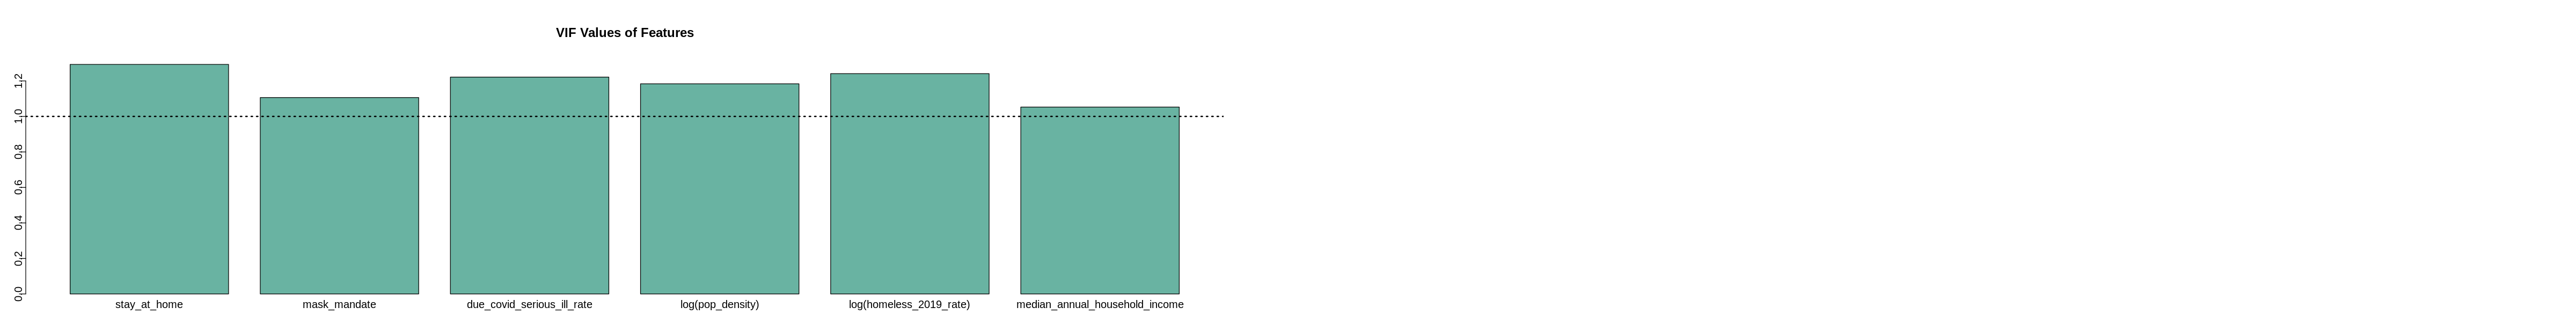

In [40]:
library(car)
options(repr.plot.height=5, repr.plot.width=40)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))

# calculate VIF
vif_values <- vif(model_24)
barplot(vif_values, main = "VIF Values of Features", horiz = FALSE, col = "#69b3a2")
abline(h = 1, lwd = 2, lty = 3)

In [43]:
# chi-square test for multi-colliniarity
tbl = table(data$stay_at_home+data$mask_mandate+data$due_covid_serious_ill_rate+
        data$pop_density+data$homeless_2019_rate+data$median_annual_household_income)                
chisq.test(tbl) 

Warning message in chisq.test(tbl):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  tbl
X-squared = 0, df = 45, p-value = 1


**3.4 Assumption-4: Zero conditional mean**

Looking at the residual vs each variables plot from the graphs above, we see that all of relationships are pretty linear. That means the conditional mean is close to 0. 

**3.5 Assumption-5: Homoskedasticity**

Looking at the residual vs predicted plot above, we see that there is a widening of residual on the extreme ends of the predicted value. This suggests that there is heteroskedasticity. Therefore, we used robust standard error rather than classical standard error in our estimation of the standard error to account for the heteroskedasticity.

One of the reasons we might have heteroskedasticity is that there are some other omitted variables or interactions that we are not including that would have help us better predict the expected infection rate at extreme ends. We will discuss these in the later sections.

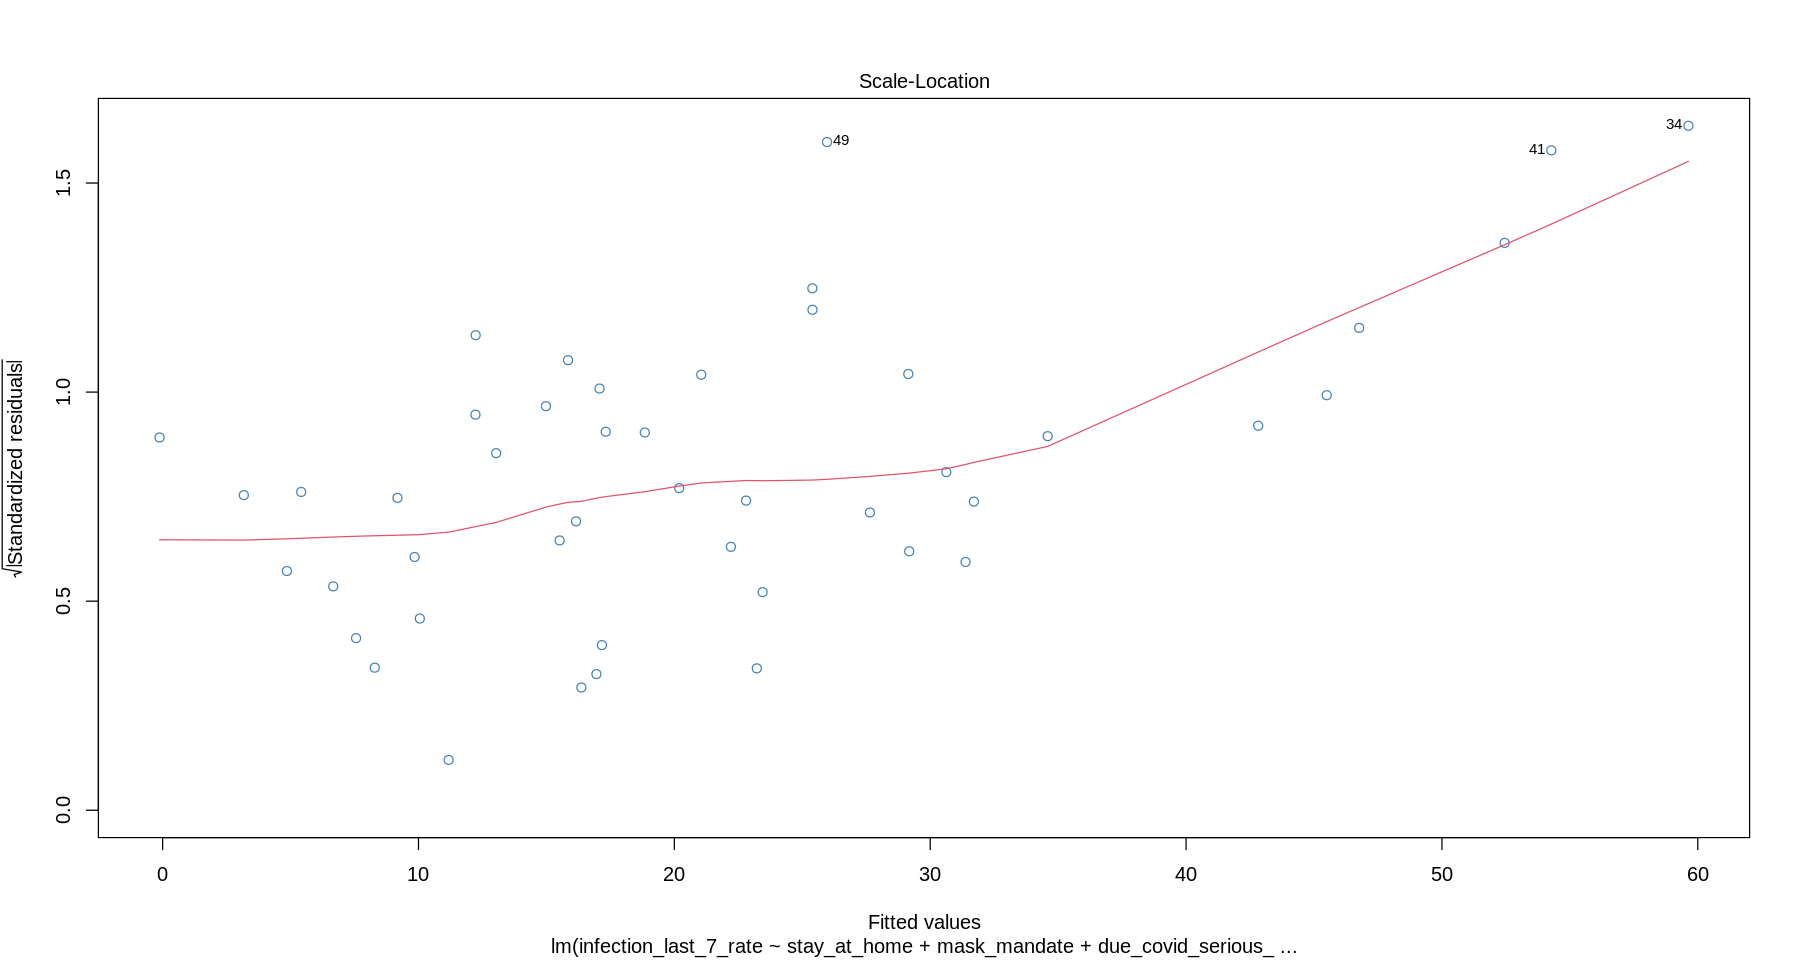

In [44]:
plot(model_24, 3, col='#4682B4')

In [45]:
bptest(model_24)


	studentized Breusch-Pagan test

data:  model_24
BP = 16.463, df = 6, p-value = 0.01147


**3.6 Assumption-6: Normality of errors**

We have used qqplot to review normality of errors, below. The histograms of residuals is used for visual verification. We see that the residual plot is **only approximately** normally distributed, there is some skewness to the left. Therefore, the P-values we have for the betas in the previous section is a little underreported, which undermines the model conclusion that the coefficient for **stay at home** is statistically significant. 

Furthermore, this could suggest there might be some other omitted variables or interactions that we are not including that would have help us better predict the expected infection rate *at extreme ends*. We will discuss these in the later sections.

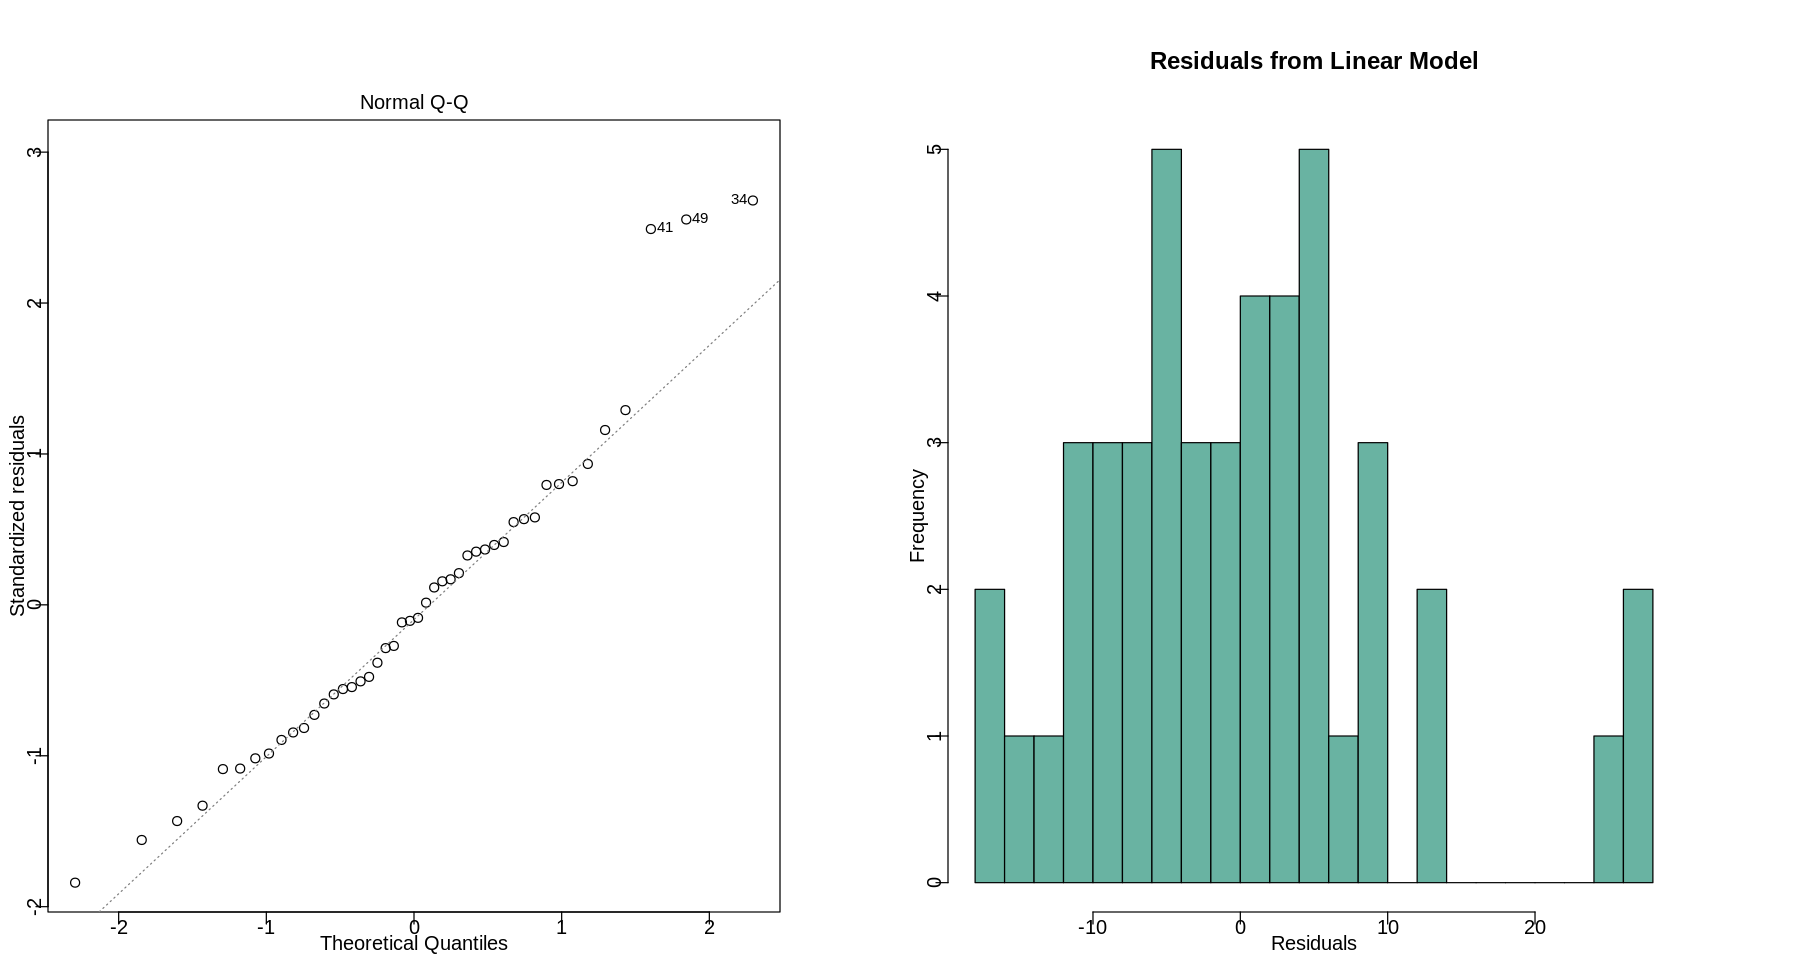

In [41]:
options(repr.plot.height=8, repr.plot.width=15)
par(mfrow=c(1,2), mar=c(2,2,5,5), mgp=c(.8,.1,0))
    
plot(model_24, which = 2)
hist(model_24$residuals, main="Residuals from Linear Model", 
    xlab="Residuals", breaks=20, col="#69b3a2")


The plots suggest slight skew to the right but is seems normally distributed.

# **4. A Regression Table - Discussion**

The approach taken in this research is to start with a single key variable (**stay_at_home, mask_mandate, legal_enforcement_mask**) This is shown earlier in Section 2.1 Model-1 (Models: *Model_11-Model_14*). 

We then added covariates that we believed enhanced our model. This is shown in Section 2.2 Model-2 (Models: *Model_21-Model24*)

Finally we added additional coviates to our model in Section 2.3 Model-3 (Models: *Model_31*). 



**4.1 Stargazer**

For this discussion, we picked Models: **Model_14** (no covariates), **Model_24** (explanatory variables and covariates that we believed advanced our model) and **Model_31** (that included many additional covariates)

In [42]:
#Review models using Stargazer - With Key Variables and many Covariates
stargazer(model_14,model_24,model_31,
          type="text",
          se = list(get_robust_se(model_14),get_robust_se(model_24),get_robust_se(model_31)
                    ),
          column.labels = c("Model-14-Key Variables","Model-24-Covariates",
                          "Model-31-additional Covariates"),
          star.cutoffs = c(0.05, 0.01, 0.001), 
          title = "Table 4: Regression Table - Key Variables and Covariates"
          )


Table 4: Regression Table - Key Variables and Covariates
                                                           Dependent variable:                             
                               ----------------------------------------------------------------------------
                                                          infection_last_7_rate                            
                               Model-14-Key Variables  Model-24-Covariates   Model-31-additional Covariates
                                        (1)                    (2)                        (3)              
-----------------------------------------------------------------------------------------------------------
stay_at_home                         -25.231**               -13.444                    -11.620            
                                      (8.714)                (7.167)                    (7.032)            
                                                                              

**4.2 Statistical Significance**


> 1. **due_covid_serious_ill_rate**: This feature represent health risks of people suseptible to serious illness. This is statistically significant. The coefficient is negative but counter-intuitive as it means more health-risk people leads to less infection rate. One reason why this can happen, is that this category of people are more cautious in theor lifestyle to prevent serious illness.   

> 2. **log(pop_density)**: Population density is statistically significant variable in our models. 

> 3. **log(homeless_2019_rate)**: This feature captures the socio-economic factors that might influence the infection rate. They aren't able to shelter unless housed in a hotel in some cities. This should positively correlate with the infection rate. We see that this requires further analysis and explanation. 

> 4. **median_annual_household_income**: This feature also captures if socio-economic status of the population has an impact on the infection rate. For people in the lower income group, it is difficult to adhere to stay at home policies or work from home. We expect this to negatively correlate with the infection rate. This feature seems to be statistically significant.



> 5. **mask_mandate**: This feature checks if the state has mandated a mask  policy. We expect this to be negatively correlate with the infection rate. This feature seems to be statistically significant.



> 6. **stay_at_home**: This feature checks if the state has mandated a stay at home policy. We expect this to be negatively correlate with the infection rate. This feature seems be statistically significant.











**4.3 Practical Significance**


> 1. **due_covid_serious_ill_rate**: From Model-24, we have 1.451 basis point decrease in infection rate for a percent increase in at risk population. This is marginally sigfnificant, but it does suggest population demographic plays an important role in the infection rate. 

> 2. **log(pop_density)**: From Model-24, we have 4.231 basis point decrease in infection rate if there is a 1% increase in population density. This seems marginally practically significant, considering the skewed population density across different states.  This is counter intuitive and requires further research. One possibility is that States with high population density rate takes the pandemic more seriously and enacted policy earlier. 

> 3. **log(homeless_2019_rate)**: From Model-24, 1% increase in homeless population rate decreases infection rate by 8.58 basis points. This is counter intuitive and requires further research. One possibility is that States with high homeless rate takes the pandemic more seriously and enacted policy earlier. 

> 4. **median_annual_household_income**: From Model-24, 10,000 increase in median annual house income is associated with 3 bps less weekly infection rate. Although it is not a lot giving the cost, it does suggest income plays a role in infection.

> 5. **mask_mandate**: This feature is practically significant mask mandate reduces weekly infection rate by 4 basis points. If the beta is true (we don't know because it is not statistically significant), mask mandate has more effect as increasing annual household income by 10,000 that is pretty significant. 

> 6. **stay_at_home**: This feature is practically significant as stay at home policy reduces the weekly infection rate by 13.444 basis points.

# **5. Discussion of Omitted Variables - Model_24**

In this lab, we tried to model the Covid-19 infection rate last 7 days for each state. In the best model (Model_24), we considered the following factors:



> 1. **Demography factors**: Population density in each state, percent population susceptible to serious illness as Covid is a highly infectious disease


> 2. **Socio-Economic factors**: Homeless rate, median annual household income as these factors may determine their behavior during the pandamemic. 













These factors provide a board picture of the Covid crisis. There are other features in the data set that may provide a better understanding of the overall infection rate due to Covid. We feel the following ommited variables if included can lead to improvement of out model.

**5.1 Omitted variable:** *infection rate before policies take place*

The infection rate before policy takes place has effect on both the state Covid policies and recent weekly infection. The higher the infection rate before the policies take place, the more likely for the State government to enact these policies (positive correlation). Furthermore, higher the infection rate before policies take place, higher the recent infection rate (positive correlation). Because this omitted variable has a positive correlation with both the explanatory variable and the outcome variable, the direction of the bias is also positive. Therefore, because we didn't include it in our model, the betas for our state policies (**stay_at_home and mask_mandate**) are less negative than it should be and biased towards 0. It may partially explain why we fail to detect a significant beta for mask mandate.

**5.2 Omitted variable:** *% of the population whose belief that personal liberty is more important than health*

If a State has enough people believe that personal liberty is more important than health then the State is less likely to enact Covid polcies (negative correlation). Furthermore, people in these States are more likely to do things that gets them infected (positive correlation). Because this omitted variable infection rate before policies take place have a negative correlation with the explanatory variable but positive correlation with the outcome variable, the direction of the bias is negative. Therefore, because we didn't include it in our model, the betas for our state policies (**stay_at_home and mask_mandate**) are more negative than it should be and biased away from 0. Fortunately, because this bias has the opposite direction compare to the bias from last omitted variable, in combination, the total bias is reduced, making the betas for our model more credible.  

# **6. Conclusion**



We detect a statistical effect size for **stay at home**, after controlling for various factors that may also contribute to infection rate. Although there are 2 omitted variable bias as discussed before, one of the bias is towards 0. Therefore we have more confidence that we detect a true effect size for stay at home. Based on the beta, the interpretation is that stay at home policy can reduce weekly infection rate by 15 bps. If we annualize the number it becomes 7.5%, assuming the average weekly effect of the state policy stays at 15 bps. Our model suggests that stay at home policy potentially prevented 7.5% of Americans from getting infected annually. That is pretty significant.  

We failed to detect a statistical effect size for **mask mandate**, even though mask has been scientifically proven to be effective. There are 5 possible reasons that may explain this counter intuitive conclusion. 

> 1. Wearing mask overamplifies the sense of safety and makes people do things that increase the likelihood of infection

> 2. Because we didn't include the baseline infection rate into our model, it is likely that States with higher baseline infection rate also are more likely to have mask mandate. This bias towards zero may have significantly reduced the absolute size of the beta 

> 3. Because mask mandate sometimes overlap with stay at home order, some of its effect is being included in the beta of stay at home.

> 4. With only 50 States and District of Columbia, we don't have enough sample size to detect the effectiveness of mask mandate.

> 5. It is difficult to measure the level of adherence to state policies curbing Covid-19 like social distancing, and mask mandate policies. It is difficult to control big crowd behavior as we have seen in various states during protests and beach openings. This is inversely corelated to population density and also inversely correlated to social economic situation (homeless_2019_rate, median_annual_household_income). As a result, the beta coefficients for these features are overestimated. The beta coefficient of percent population susceptible to serious illness (due_covid_serious_ill_rate) is underestimated.

